In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.python.ops.math_ops import reduce_prod

from tensorflow.keras.layers import TextVectorization

from tensorflow.keras.layers import Embedding


In [ ]:
!pip install scikit-learn


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load the CSV file
data = pd.read_csv('/content/fake_job_postings.csv', on_bad_lines='skip') # Replace with your file path
# Extract descriptions and labels
descriptions = data['description'].fillna('') # Handle NaNs in descriptions
labels = data['fraudulent'] # Labels (0 for real, 1 for fake)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(descriptions, labels, test_size=0.2, random_state=42)

# Convert text data to TF-IDF features with a smaller max_features limit
vectorizer = TfidfVectorizer(max_features=1000) # Reduce the number of features to 1000
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Adding random noise to the labels (increase noise)
noise_factor = 0.30 # Increase this factor to introduce more noise
y_train_noisy = y_train.copy()
for i in range(len(y_train)):
  if np.random.rand() < noise_factor:
    y_train_noisy.iloc[i] = 1 - y_train_noisy.iloc[i] # Flip the label with a probability of noise_factor

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(max_depth=3, min_samples_split=20) # Limit depth and min samples
decision_tree.fit(X_train_tfidf, y_train_noisy) # Train with noisy labels

# Predict and evaluate Decision Tree
y_pred_dt = decision_tree.predict(X_test_tfidf)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')

# Logistic Regression Classifier
logistic_regression = LogisticRegression(max_iter=50) # Lower max_iter to slow convergence
logistic_regression.fit(X_train_tfidf, y_train_noisy) # Train with noisy labels

# Predict and evaluate Logistic Regression
y_pred_lr = logistic_regression.predict(X_test_tfidf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')





Decision Tree Accuracy: 0.95
Logistic Regression Accuracy: 0.94


In [ ]:
!pip install tensorflow


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Dense, GlobalMaxPooling1D, Dropout
import numpy as np

# Load the dataset
data = pd.read_csv('/content/fake_job_postings.csv')  # Replace with your file path

# Extract descriptions and labels
descriptions = data['description'].fillna('')  # Handle NaNs in descriptions
labels = data['fraudulent']  # Labels (0 for real, 1 for fake)

# Encode the labels (0 and 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(descriptions, y, test_size=0.2, random_state=42)

# Tokenize and pad the text sequences
max_words = 5000
max_len = 500
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Introduce random noise in the labels
noise_factor = 0.3  # Increased noise factor to 30%
y_train_noisy = y_train.copy()
for i in range(len(y_train)):
    if np.random.rand() < noise_factor:
        y_train_noisy[i] = 1 - y_train_noisy[i]  # Flip the label with a probability of noise_factor

# Build the CNN model with reduced complexity
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_len))  # Further reduced output_dim
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))  # Reduced filters
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))  # Added dropout layer to prevent overfitting
model.add(GlobalMaxPooling1D())
model.add(Dense(3, activation='relu'))  # Reduced number of units in the dense layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model with fewer epochs
model.fit(X_train_pad, y_train_noisy, epochs=3, batch_size=64, validation_data=(X_test_pad, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy:.2f}')






/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
224/224 ━━━━━━━━━━━━━━━━━━━━ 26s 96ms/step - accuracy: 0.6531 - loss: 0.6855 - val_accuracy: 0.9494 - val_loss: 0.6069
Epoch 2/3
224/224 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - accuracy: 0.6892 - loss: 0.6542 - val_accuracy: 0.9494 - val_loss: 0.5453
Epoch 3/3
224/224 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.6831 - loss: 0.6398 - val_accuracy: 0.9494 - val_loss: 0.5013
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9512 - loss: 0.5003
Test Accuracy: 0.95


In [ ]:
import pandas as pd
import tensorflow as tf

# File path to the local fraudulent_jobs.csv
jobs_file = "./fake_job_postings.csv"

# Load the dataset using pandas
df = pd.read_csv(jobs_file)

# Display the first few rows of the dataframe
df.head()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:

df.drop(columns=['job_id'], inplace=True)
df.rename(columns={'telecommuting': 'work_remote'}, inplace=True)
df.columns



Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'work_remote',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17879 non-null  object
 6   requirements         15184 non-null  object
 7   benefits             10668 non-null  object
 8   work_remote          17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

In [ ]:

df.nunique()

,0
title,11231
location,3105
department,1337
salary_range,874
company_profile,1709
description,14801
requirements,11967
benefits,6204
work_remote,2
has_company_logo,2


In [ ]:

df.isna().sum()

,0
title,0
location,346
department,11547
salary_range,15012
company_profile,3308
description,1
requirements,2696
benefits,7212
work_remote,0
has_company_logo,0


In [ ]:

df['fraudulent'].value_counts()


,count
fraudulent,
0,17014
1,866


In [ ]:

text_cols = ['title', 'location', 'department', 'company_profile', 'description', 'requirements', 'benefits']
categorical_cols = ['employment_type', 'required_experience', 'required_education', 'industry', 'function']
numeric_cols = ['work_remote', 'has_company_logo', 'has_questions', 'salary_low', 'salary_high']
col_to_predict = ['fraudulent']


In [ ]:
def move_column(df, col):
  df['Temp_Col'] = df[col]
  df.drop(columns=[col], inplace=True)
  df.rename(columns={'Temp_Col': col}, inplace=True)
  return df

In [ ]:

df['employment_type'].fillna('No Data', inplace=True)
df['required_experience'].fillna('No Data', inplace=True)
df['required_education'].fillna('No Data', inplace=True)
df['industry'].fillna('No Data', inplace=True)
df['function'].fillna('No Data', inplace=True)


<ipython-input-10-eaa632796b54>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['employment_type'].fillna('No Data', inplace=True)
<ipython-input-10-eaa632796b54>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [ ]:

df.isna().sum()

,0
title,0
location,346
department,11547
salary_range,15012
company_profile,3308
description,1
requirements,2696
benefits,7212
work_remote,0
has_company_logo,0


In [ ]:

df.notna().sum()

,0
title,17880
location,17534
department,6333
salary_range,2868
company_profile,14572
description,17879
requirements,15184
benefits,10668
work_remote,17880
has_company_logo,17880


In [ ]:
df[df['description'].isna()] #only 1 row with an empty description -- the post only has title and location and it is a fraud post --> keeping it


,title,location,department,salary_range,company_profile,description,requirements,benefits,work_remote,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17513,Office Manager,"PL, MZ, Warsaw",NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,No Data,No Data,No Data,No Data,No Data,1


In [ ]:

null_text = df[(df['location'].isna()) & (df['department'].isna()) & (df['company_profile'].isna()) & (df['requirements'].isna()) & (df['benefits'].isna())]
# 'title', 'location', 'department', 'company_profile', 'description', 'requirements', 'benefits'
print(f"There are {null_text.shape[0]} rows where all text columns aside from 'title' and 'description' are empty. Of these rows, {null_text['fraudulent'].sum()} are fraudulent posts.")


There are 19 rows where all text columns aside from 'title' and 'description' are empty. Of these rows, 12 are fraudulent posts.


In [ ]:
for col in text_cols:
  df[col].fillna(value=" ", inplace=True)
  print(f"Max length of '{col}': {df[col].map(len).max()}")


<ipython-input-15-168e779a1149>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(value=" ", inplace=True)


Max length of 'title': 142
Max length of 'location': 161
Max length of 'department': 255
Max length of 'company_profile': 6178
Max length of 'description': 14907
Max length of 'requirements': 10864
Max length of 'benefits': 4429


In [ ]:

df['full_text'] = df['title'] + " " + df['location'] + " " + df['department']  + " " + df['company_profile']  + " " + df['description']  + " " + df['requirements']  + " "  + df['benefits']
df['full_text'][0]

"Marketing Intern US, NY, New York Marketing We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food communi

In [ ]:

print(f"Min length of 'full text': {df['full_text'].map(len).min()}")
print(f"Max length of 'full text': {df['full_text'].map(len).max()}")

Min length of 'full text': 33
Max length of 'full text': 14964


In [ ]:
def update_text(new_df):
  new_df['full_text'] = new_df['full_text'].str.replace(pat='US', repl='USA', case=True)
  new_df['location'] = new_df['location'].str.replace(pat='US', repl='USA', case=True)
  return new_df

In [ ]:

df = update_text(df)


In [ ]:

def space_words(all_text):
  import re

  result = re.sub('(?<=[A-Za-z])(?=[A-Z][a-z])', '~', all_text)
  result = re.split('~', result)
  result = ' '.join(result)
  all_text = result

  return all_text

In [ ]:
texts = ['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'full_text']

for col in texts:
  df[col] = df[col].apply(space_words)

In [ ]:

df.head(1)

,title,location,department,salary_range,company_profile,description,requirements,benefits,work_remote,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,full_text
0,Marketing Intern,"USA, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,No Data,No Data,Marketing,0,"Marketing Intern USA, NY, New York Marketing W..."


In [ ]:
def get_unique_words(new_df, col):
  unique_words = []
  idx = list(new_df.index.values)
  for i in idx:
    x = list(new_df[col][i].split())
    unique_words += x
  return unique_words

In [ ]:
for col in texts:
  print(f'Number of total words in {col}: {len(get_unique_words(df, col))}')
  print(f'Number of unique words in {col}: {len(set(get_unique_words(df, col)))}\n')

Number of total words in title: 67673
Number of unique words in title: 7819

Number of total words in location: 55748
Number of unique words in location: 2713

Number of total words in department: 8883
Number of unique words in department: 1218

Number of total words in company_profile: 1668791
Number of unique words in company_profile: 28263

Number of total words in description: 3110058
Number of unique words in description: 127256

Number of total words in requirements: 1457315
Number of unique words in requirements: 85515

Number of total words in benefits: 553942
Number of unique words in benefits: 27944

Number of total words in employment_type: 21351
Number of unique words in employment_type: 7

Number of total words in required_experience: 32552
Number of unique words in required_experience: 11

Number of total words in required_education: 38486
Number of unique words in required_education: 22

Number of total words in industry: 39744
Number of unique words in industry: 193

Nu

In [ ]:
salary_df = df['salary_range'].str.split(pat='-', n=-1, expand=True)
salary_df[0].unique()[90:100]


array(['96000', '1050', '400000', 'Oct', '800000', '335000', '960000',
       '55', '480000', '24900'], dtype=object)

In [ ]:

months_to_int = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

for i in range(salary_df[0].shape[0]):
  if salary_df[0][i] in months_to_int.keys():
    salary_df[0][i] = months_to_int[salary_df[0][i]]

for i in range(salary_df[1].shape[0]):
  if salary_df[1][i] in months_to_int.keys():
    salary_df[1][i] = months_to_int[salary_df[1][i]]

<ipython-input-26-e7adcaa5e12a>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  salary_df[0][i] = months_to_int[salary_df[0][i]]
<ipython-input-26-e7adcaa5e12a>:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!


In [ ]:

salary_df[0].unique()[90:100]


array(['96000', '1050', '400000', 10, '800000', '335000', '960000', '55',
       '480000', '24900'], dtype=object)

In [ ]:
salary_df.fillna(value=-1, inplace=True)
salary_df[0] = np.array(salary_df[0], dtype='int64')
salary_df[1] = np.array(salary_df[1], dtype='int64')

df['salary_low'] = salary_df[0]
df['salary_high'] = salary_df[1]
df.drop(columns=['salary_range'], inplace=True)

df['salary_low'].replace(-1, np.nan, inplace=True)
df['salary_high'].replace(-1, np.nan, inplace=True)

df['salary_low'] = df['salary_low'].astype('Int64')
df['salary_high'] = df['salary_high'].astype('Int64')


<ipython-input-28-63e45d0bf5da>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salary_low'].replace(-1, np.nan, inplace=True)
<ipython-input-28-63e45d0bf5da>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
df[df['salary_low'].notnull() & df['salary_high'].notnull()][:3] #some examples showing that the salary was converted back to an int value


,title,location,department,company_profile,description,requirements,benefits,work_remote,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,full_text,salary_low,salary_high
6,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0,"Head of Content (m/f) DE, BE, Berlin ANDROIDPI...",20000,28000
10,ASP.net Developer Job opportunity at United St...,"USA, NJ, Jersey City",,,Position : #URL_86fd830a95a64e2b30ceed829e63fd...,Position : #URL_86fd830a95a64e2b30ceed829e63fd...,Benefits - Full Bonus Eligible - Yes Interview...,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0,ASP.net Developer Job opportunity at United St...,100000,120000
15,VP of Sales - Vault Dragon,"SG, 01, Singapore",Sales,Jungle Ventures is the leading Singapore based...,About Vault Dragon Vault Dragon is Dropbox for...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0,"VP of Sales - Vault Dragon SG, 01, Singapore S...",120000,150000


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

print('dataframe shape:',df.shape)

train, test_x = train_test_split(df, train_size=0.8, random_state=1, shuffle=True, stratify=df.fraudulent.values)
print("train shape:",train.shape)
print('test shape:',test_x.shape)

train_x, val_x = train_test_split(train, train_size = 0.8, random_state=1, shuffle = True, stratify=train.fraudulent.values)
print("train_x shape:",train_x.shape)
print('val shape:',val_x.shape)


dataframe shape: (17880, 19)
train shape: (14304, 19)
test shape: (3576, 19)
train_x shape: (11443, 19)
val shape: (2861, 19)


In [ ]:
train_x['employment_type'].isna().sum()

0

In [ ]:

numeric_columns = train_x.select_dtypes(include=[np.number])

grouped_mean = numeric_columns.groupby(train_x['employment_type']).mean()

print(grouped_mean)


                 work_remote  has_company_logo  has_questions  fraudulent  \
employment_type                                                             
Contract            0.086207          0.830629       0.653144    0.032454   
Full-time           0.039903          0.800485       0.464546    0.041116   
No Data             0.037387          0.745045       0.480631    0.068468   
Other               0.051948          0.805195       0.649351    0.064935   
Part-time           0.058939          0.785855       0.495088    0.104126   
Temporary           0.012821          0.865385       0.512821    0.012821   

                    salary_low     salary_high  
employment_type                                 
Contract          35562.509091    55320.754545  
Full-time        886959.068414  1397585.145234  
No Data           51559.694444    81863.083333  
Other             18826.555556   335284.444444  
Part-time         15085.763889    27513.916667  
Temporary         14091.304348    17356.

In [ ]:
salary_means = {}
employment_types = list(train_x['employment_type'].unique())
employment_types.sort()
employment_types

['Contract', 'Full-time', 'No Data', 'Other', 'Part-time', 'Temporary']

In [ ]:
low_means = list(train_x.groupby('employment_type')['salary_low'].mean())
high_means = list(train_x.groupby('employment_type')['salary_high'].mean())
salary_means = {}
for i in range(len(employment_types)):
  salary_means[employment_types[i]] = [int(low_means[i]), int(high_means[i])]

print("List of Means (from train_x dataset):", salary_means)


List of Means (from train_x dataset): {'Contract': [35562, 55320], 'Full-time': [886959, 1397585], 'No Data': [51559, 81863], 'Other': [18826, 335284], 'Part-time': [15085, 27513], 'Temporary': [14091, 17356]}


In [ ]:
for et in employment_types:
    temp = df[df['employment_type'] == et] #separate the group
    temp['salary_low'].fillna(salary_means[et][0], inplace=True)
    temp['salary_high'].fillna(salary_means[et][1], inplace=True)
    df.update(temp, overwrite=False)

df['salary_low'] = df['salary_low'].astype('int64')
df['salary_high'] = df['salary_high'].astype('int64')
print(df.shape)
df.isna().sum()


<ipython-input-35-dece524e9475>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp['salary_low'].fillna(salary_means[et][0], inplace=True)
<ipython-input-35-dece524e9475>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['salary_low'].fillna(salary_means[et][0], inplace=True)
<ipython-input-35-dece524e9475>:4: FutureWarning: A value is 

(17880, 19)


,0
title,0
location,0
department,0
company_profile,0
description,0
requirements,0
benefits,0
work_remote,0
has_company_logo,0
has_questions,0


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17880 non-null  object
 2   department           17880 non-null  object
 3   company_profile      17880 non-null  object
 4   description          17880 non-null  object
 5   requirements         17880 non-null  object
 6   benefits             17880 non-null  object
 7   work_remote          17880 non-null  int64 
 8   has_company_logo     17880 non-null  int64 
 9   has_questions        17880 non-null  int64 
 10  employment_type      17880 non-null  object
 11  required_experience  17880 non-null  object
 12  required_education   17880 non-null  object
 13  industry             17880 non-null  object
 14  function             17880 non-null  object
 15  fraudulent           17880 non-null  int64 
 16  full

In [ ]:
df_preproc_done = df.copy()
df_preproc_done.columns


Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'work_remote', 'has_company_logo',
       'has_questions', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent', 'full_text',
       'salary_low', 'salary_high'],
      dtype='object')

In [ ]:

df['title'] = df['full_text']
df.drop(columns=['location', 'department', 'company_profile', 'description', 'requirements', 'benefits', 'full_text'], inplace=True)
df.rename(columns={'title': 'full_text'}, inplace=True)

df = move_column(df, 'fraudulent')
df.head(1)

,full_text,work_remote,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_low,salary_high,fraudulent
0,"Marketing Intern USA, NY, New York Marketing W...",0,1,0,Other,Internship,No Data,No Data,Marketing,18826,335284,0


In [ ]:

df['fraudulent'].value_counts()

,count
fraudulent,
0,17014
1,866


In [ ]:

real_df = df[df['fraudulent'] == 0]
fraud_df = df[df['fraudulent'] == 1]

In [ ]:
real_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17014 entries, 0 to 17879
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   full_text            17014 non-null  object
 1   work_remote          17014 non-null  int64 
 2   has_company_logo     17014 non-null  int64 
 3   has_questions        17014 non-null  int64 
 4   employment_type      17014 non-null  object
 5   required_experience  17014 non-null  object
 6   required_education   17014 non-null  object
 7   industry             17014 non-null  object
 8   function             17014 non-null  object
 9   salary_low           17014 non-null  int64 
 10  salary_high          17014 non-null  int64 
 11  fraudulent           17014 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 1.7+ MB


In [ ]:

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 866 entries, 98 to 17831
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   full_text            866 non-null    object
 1   work_remote          866 non-null    int64 
 2   has_company_logo     866 non-null    int64 
 3   has_questions        866 non-null    int64 
 4   employment_type      866 non-null    object
 5   required_experience  866 non-null    object
 6   required_education   866 non-null    object
 7   industry             866 non-null    object
 8   function             866 non-null    object
 9   salary_low           866 non-null    int64 
 10  salary_high          866 non-null    int64 
 11  fraudulent           866 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 88.0+ KB


In [ ]:

print("Min and Max Lengths of 'full_text' in train, val, test ----")
print(f"train - min: {train_x['full_text'].map(len).min()}, max: {train_x['full_text'].map(len).max()}")
print(f"val - min: {val_x['full_text'].map(len).min()}, max: {val_x['full_text'].map(len).max()}")
print(f"test - min: {test_x['full_text'].map(len).min()}, max: {test_x['full_text'].map(len).max()}")

Min and Max Lengths of 'full_text' in train, val, test ----
train - min: 47, max: 13533
val - min: 39, max: 10883
test - min: 33, max: 14968


In [ ]:
import collections
from collections import Counter
import seaborn as sns

<ipython-input-45-6010e03aa08a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fraudulent', data=df, palette='hls')


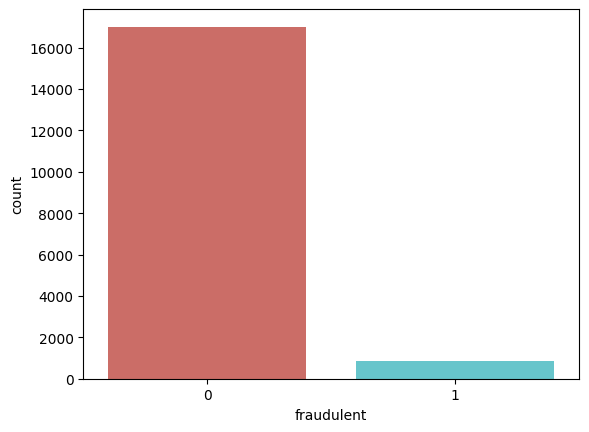

In [ ]:

sns.countplot(x='fraudulent', data=df, palette='hls')
plt.show()


In [ ]:

df['employment_type'].value_counts()

,count
employment_type,
Full-time,11620
No Data,3471
Contract,1524
Part-time,797
Temporary,241
Other,227


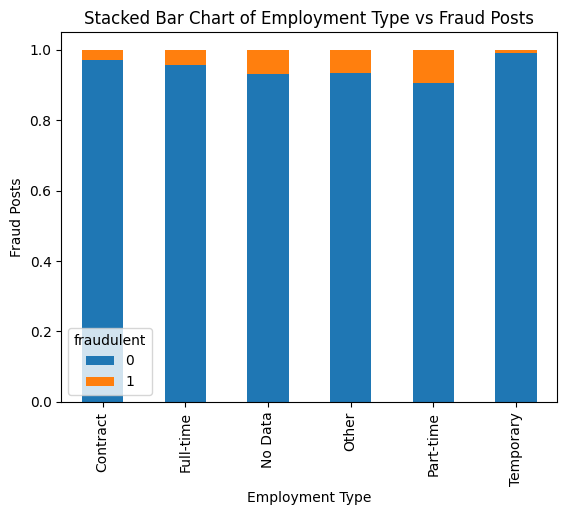

In [ ]:
table=pd.crosstab(df.employment_type, df.fraudulent)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Employment Type vs Fraud Posts')
plt.xlabel('Employment Type')
plt.ylabel('Fraud Posts')
plt.show()

In [ ]:

df['required_experience'].value_counts()

,count
required_experience,
No Data,7050
Mid-Senior level,3809
Entry level,2697
Associate,2297
Not Applicable,1116
Director,389
Internship,381
Executive,141


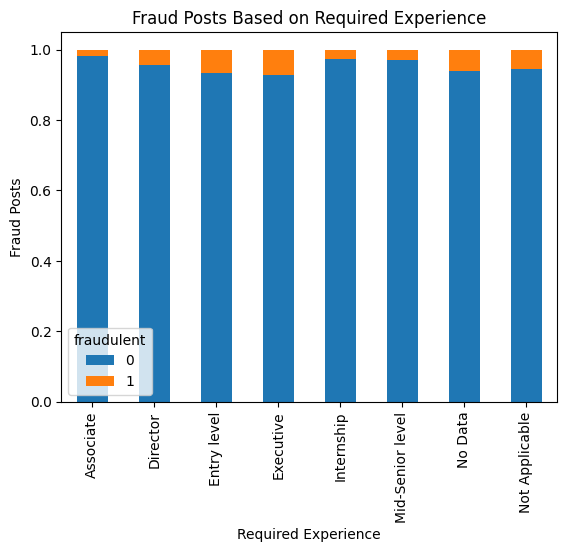

In [ ]:

%matplotlib inline

table=pd.crosstab(df.required_experience, df.fraudulent)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fraud Posts Based on Required Experience')
plt.xlabel('Required Experience')
plt.ylabel('Fraud Posts')
plt.show()

In [ ]:
df['required_education'].value_counts()

,count
required_education,
No Data,8105
Bachelor's Degree,5145
High School or equivalent,2080
Unspecified,1397
Master's Degree,416
Associate Degree,274
Certification,170
Some College Coursework Completed,102
Professional,74


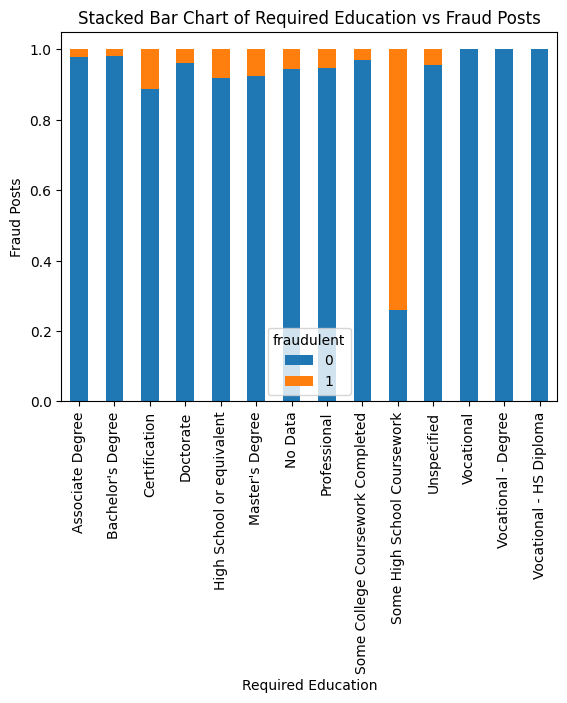

In [ ]:

table=pd.crosstab(df.required_education, df.fraudulent)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Required Education vs Fraud Posts')
plt.xlabel('Required Education')
plt.ylabel('Fraud Posts')
plt.show()

In [ ]:
df[(df['required_education'] == 'Some High School Coursework') & (df['fraudulent'] == 1)].shape[0] #20 fraud posts out of 27 total posts


20

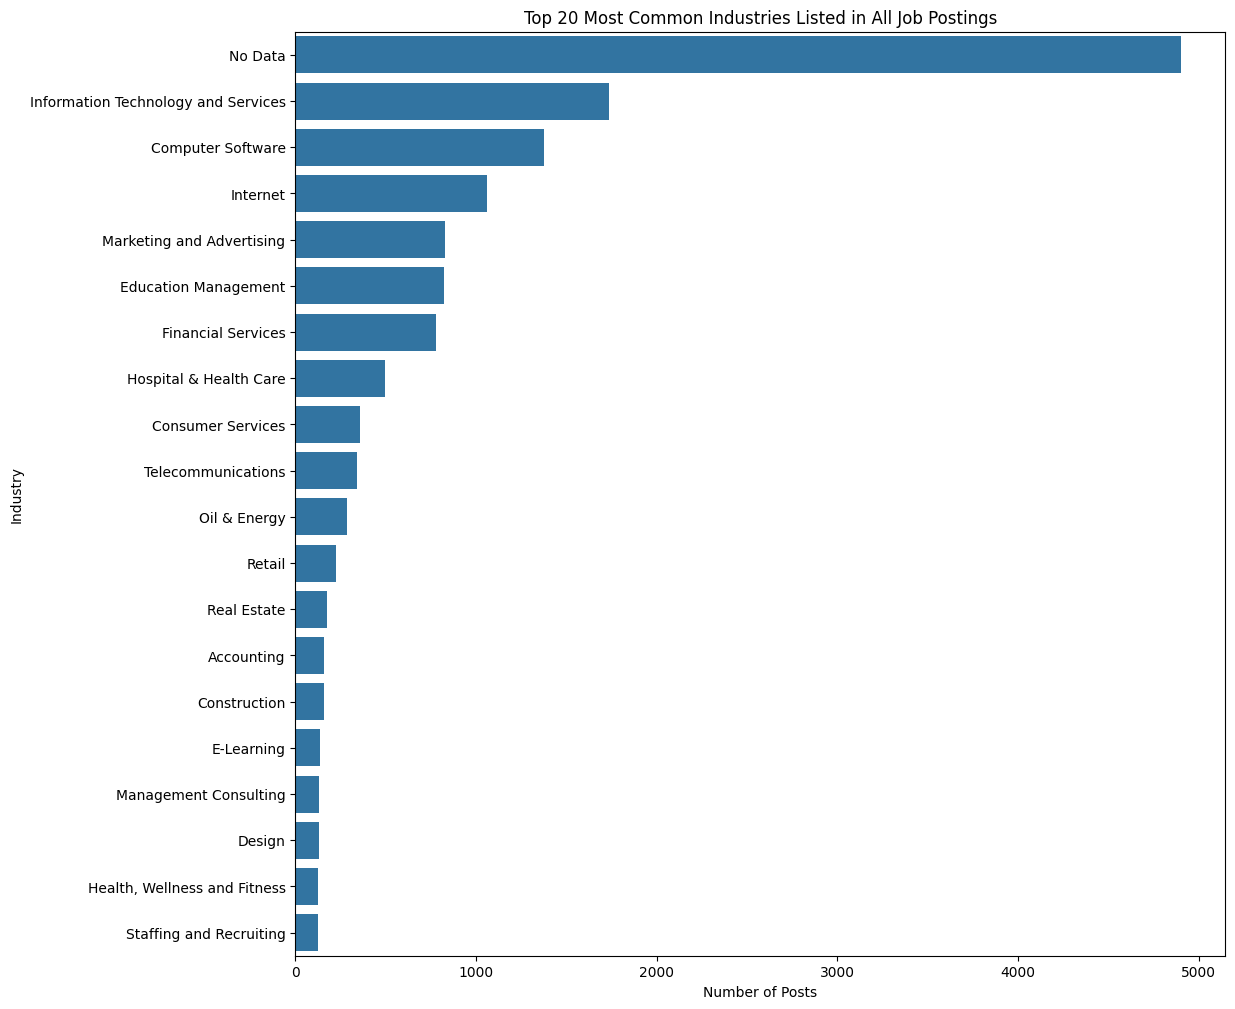

In [ ]:

industry=list(df['industry'])
counts = Counter(industry).most_common(20)
counts_df = pd.DataFrame(counts)
counts_df.columns=['Industry', 'Number of Posts']
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.barplot(y='Industry', x='Number of Posts', ax=ax, data=counts_df)
plt.title("Top 20 Most Common Industries Listed in All Job Postings")
plt.show()


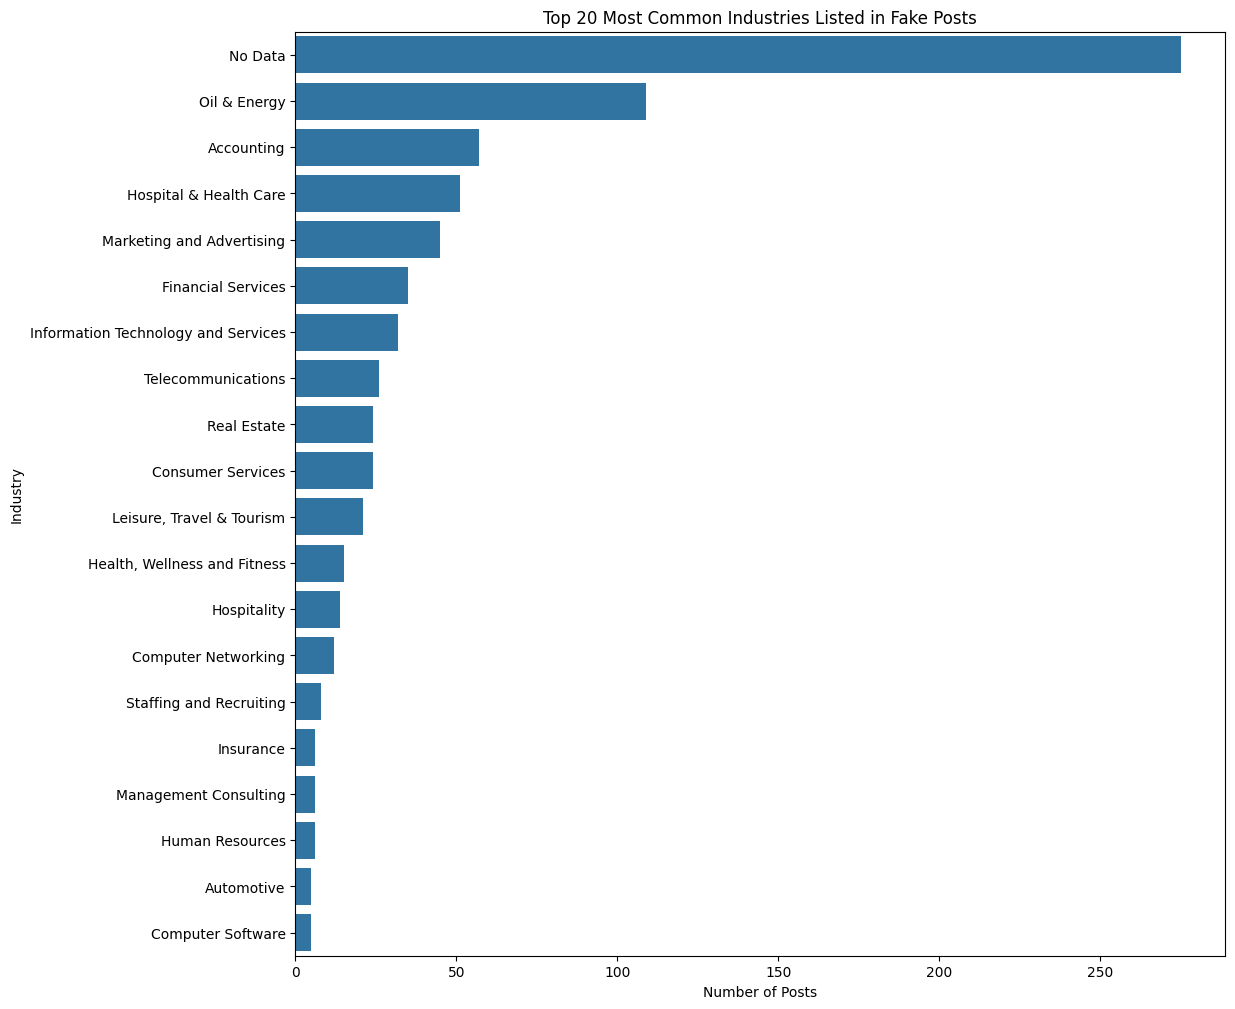

In [ ]:

industry=list(fraud_df['industry'])
counts = Counter(industry).most_common(20)
counts_df = pd.DataFrame(counts)
counts_df.columns=['Industry', 'Number of Posts']
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.barplot(y='Industry', x='Number of Posts', ax=ax, data=counts_df)
plt.title("Top 20 Most Common Industries Listed in Fake Posts")
plt.show()


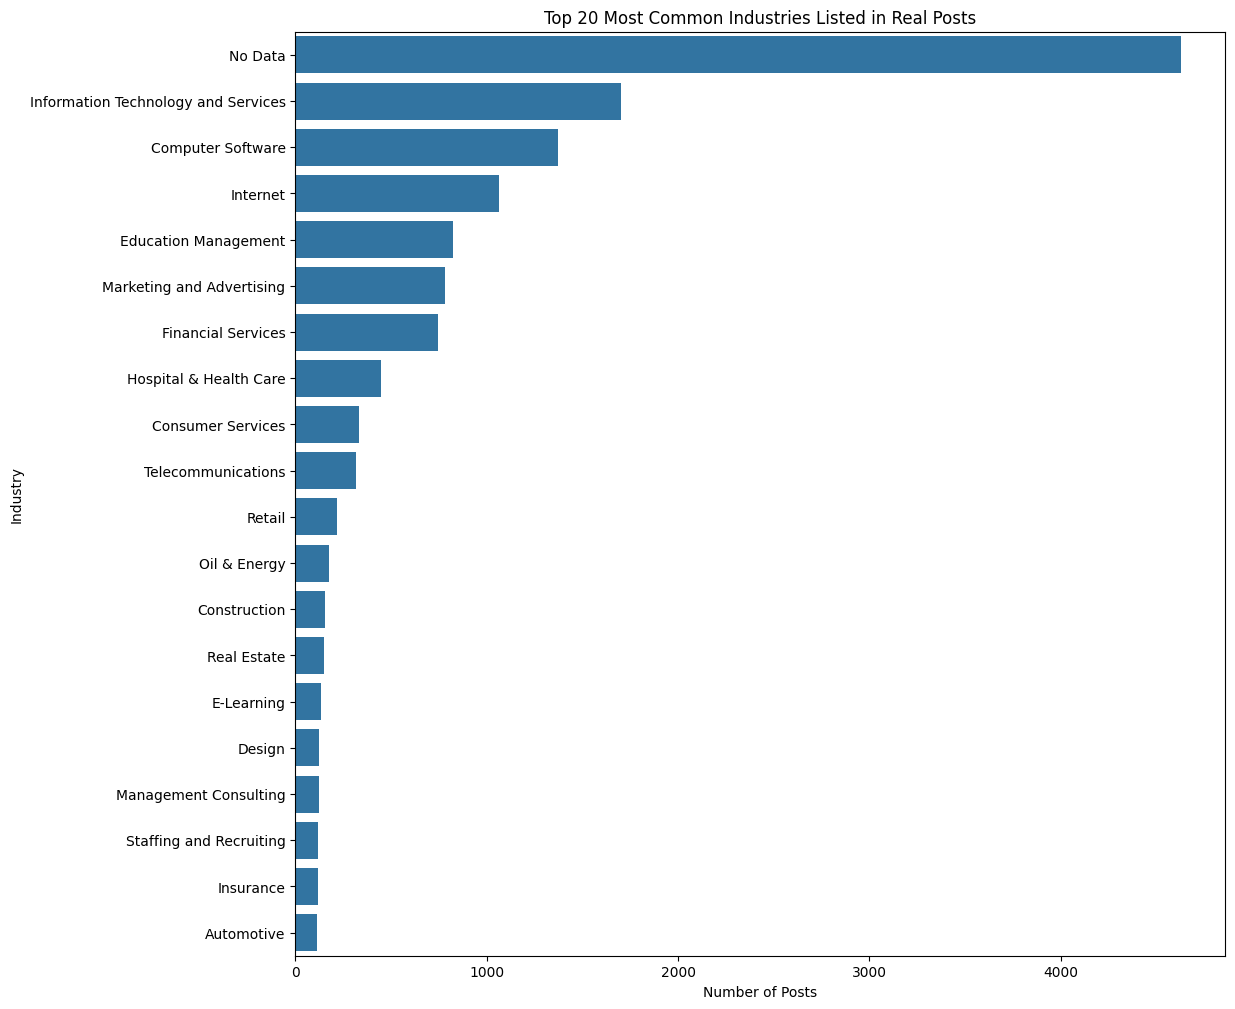

In [ ]:

industry=list(real_df['industry'])
counts = Counter(industry).most_common(20)
counts_df = pd.DataFrame(counts)
counts_df.columns=['Industry', 'Number of Posts']
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.barplot(y='Industry', x='Number of Posts', ax=ax, data=counts_df)
plt.title("Top 20 Most Common Industries Listed in Real Posts")
plt.show()


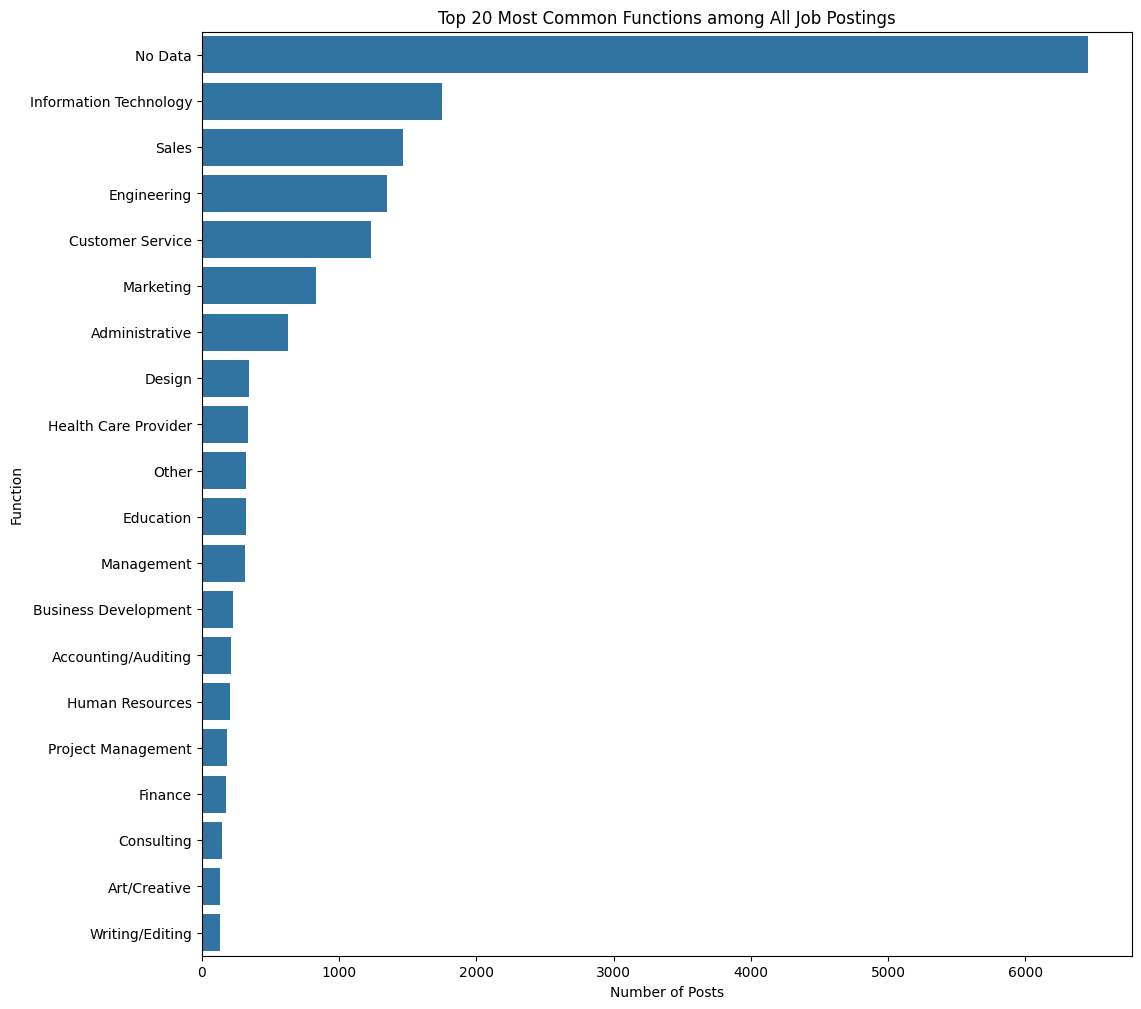

In [ ]:

function=list(df['function'])
counts = Counter(function).most_common(20)
counts_df = pd.DataFrame(counts)
counts_df.columns=['Function', 'Number of Posts']
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.barplot(y='Function', x='Number of Posts', ax=ax, data=counts_df)
plt.title('Top 20 Most Common Functions among All Job Postings')
plt.show()


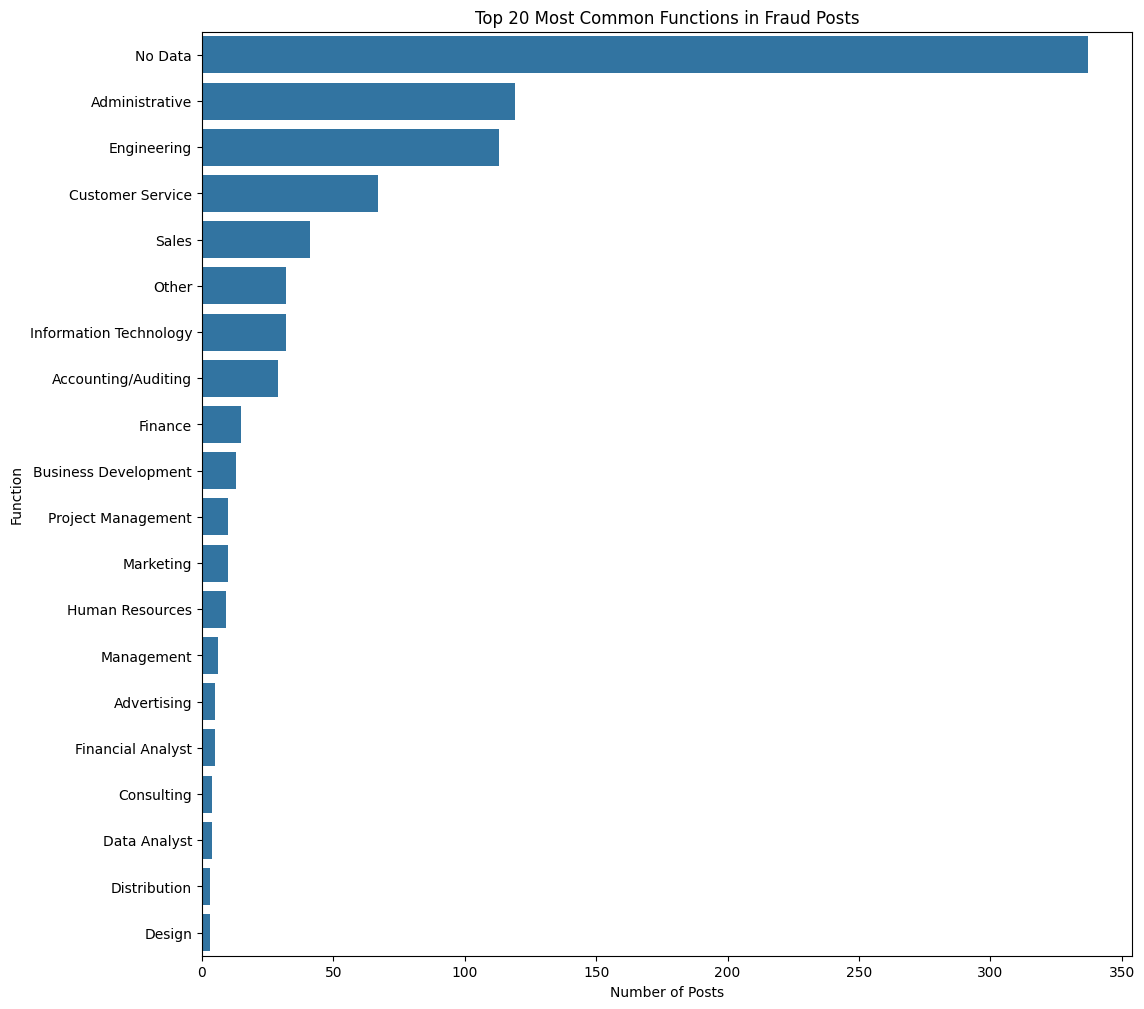

In [ ]:

function=list(fraud_df['function'])
counts = Counter(function).most_common(20)
counts_df = pd.DataFrame(counts)
counts_df.columns=['Function', 'Number of Posts']
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.barplot(y='Function', x='Number of Posts', ax=ax, data=counts_df)
plt.title('Top 20 Most Common Functions in Fraud Posts')
plt.show()


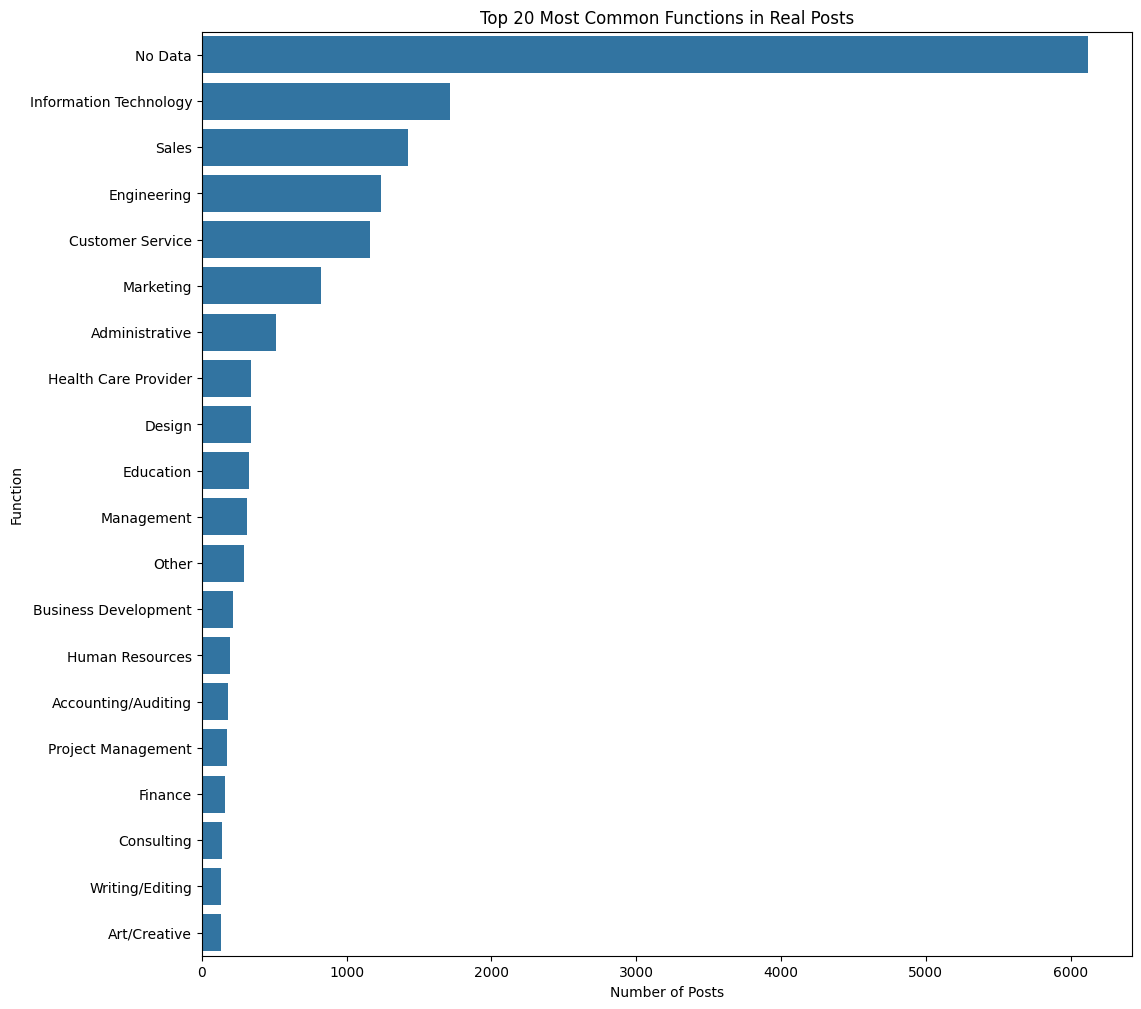

In [ ]:

function=list(real_df['function'])
counts = Counter(function).most_common(20)
counts_df = pd.DataFrame(counts)
counts_df.columns=['Function', 'Number of Posts']
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.barplot(y='Function', x='Number of Posts', ax=ax, data=counts_df)
plt.title('Top 20 Most Common Functions in Real Posts')
plt.show()


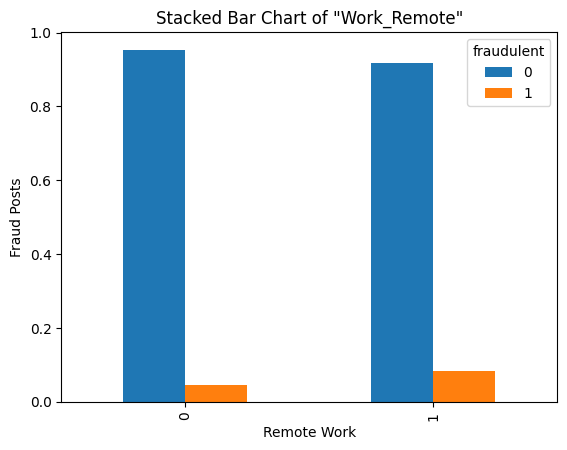

In [ ]:

table=pd.crosstab(df.work_remote, df.fraudulent)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Stacked Bar Chart of "Work_Remote"')
plt.xlabel('Remote Work')
plt.ylabel('Fraud Posts')
plt.show()

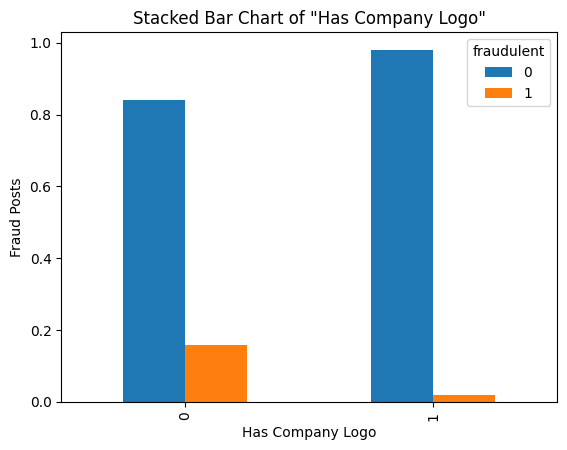

In [ ]:
table=pd.crosstab(df.has_company_logo, df.fraudulent)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Stacked Bar Chart of "Has Company Logo"')
plt.xlabel('Has Company Logo')
plt.ylabel('Fraud Posts')
plt.show()

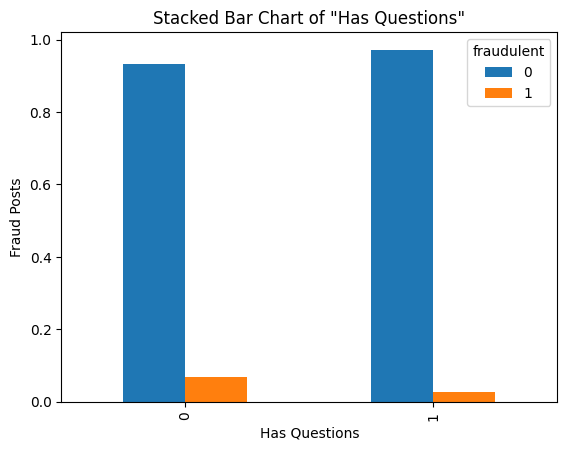

In [ ]:
table=pd.crosstab(df.has_questions, df.fraudulent)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Stacked Bar Chart of "Has Questions"')
plt.xlabel('Has Questions')
plt.ylabel('Fraud Posts')
plt.show()

In [ ]:

print("Shape before one-hot-encoding:", df.shape)

Shape before one-hot-encoding: (17880, 12)


In [ ]:

df = pd.get_dummies(df, columns=['employment_type', 'required_experience', 'required_education', 'industry', 'function']) #categorical_cols = ['employment_type', 'required_experience', 'required_education', 'industry', 'function']
print('Shape after one-hot-encoding:',df.shape) #(17880, 205)
df.head(1)

Shape after one-hot-encoding: (17880, 205)


,full_text,work_remote,has_company_logo,has_questions,salary_low,salary_high,fraudulent,employment_type_Contract,employment_type_Full-time,employment_type_No Data,...,function_Public Relations,function_Purchasing,function_Quality Assurance,function_Research,function_Sales,function_Science,function_Strategy/Planning,function_Supply Chain,function_Training,function_Writing/Editing
0,"Marketing Intern USA, NY, New York Marketing W...",0,1,0,18826,335284,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:

print('dataframe shape:',df.shape)
train, test_x = train_test_split(df, train_size=0.8, random_state=1, shuffle=True, stratify=df.fraudulent.values)
# print("train shape:",train.shape)

train_x, val_x= train_test_split(train, train_size = 0.8, random_state=1, shuffle = True, stratify=train.fraudulent.values)
print("train_x shape:",train_x.shape)
print('val shape:',val_x.shape)
print('test shape:',test_x.shape)

dataframe shape: (17880, 205)
train_x shape: (11443, 205)
val shape: (2861, 205)
test shape: (3576, 205)


In [ ]:
train_x.nunique()

,0
full_text,11281
work_remote,2
has_company_logo,2
has_questions,2
salary_low,206
...,...
function_Science,2
function_Strategy/Planning,2
function_Supply Chain,2
function_Training,2


In [ ]:

train_x.nunique()[:41]

,0
full_text,11281
work_remote,2
has_company_logo,2
has_questions,2
salary_low,206
salary_high,229
fraudulent,2
employment_type_Contract,2
employment_type_Full-time,2
employment_type_No Data,2


In [ ]:

train_x.nunique()[41:82]

,0
industry_Automotive,2
industry_Aviation & Aerospace,2
industry_Banking,2
industry_Biotechnology,2
industry_Broadcast Media,2
industry_Building Materials,2
industry_Business Supplies and Equipment,2
industry_Capital Markets,2
industry_Chemicals,2
industry_Civic & Social Organization,2


In [ ]:

train_x.nunique()[82:123]

,0
industry_Government Relations,2
industry_Graphic Design,2
"industry_Health, Wellness and Fitness",2
industry_Higher Education,2
industry_Hospital & Health Care,2
industry_Hospitality,2
industry_Human Resources,2
industry_Import and Export,2
industry_Individual & Family Services,2
industry_Industrial Automation,2


In [ ]:

train_x.nunique()[123:164]

,0
industry_Nonprofit Organization Management,2
industry_Oil & Energy,2
industry_Online Media,2
industry_Outsourcing/Offshoring,2
industry_Package/Freight Delivery,1
industry_Packaging and Containers,2
industry_Performing Arts,2
industry_Pharmaceuticals,2
industry_Philanthropy,2
industry_Photography,2


In [ ]:

train_x.nunique()[164:]


,0
industry_Wine and Spirits,1
industry_Wireless,2
industry_Writing and Editing,2
function_Accounting/Auditing,2
function_Administrative,2
function_Advertising,2
function_Art/Creative,2
function_Business Analyst,2
function_Business Development,2
function_Consulting,2


In [ ]:

print('industry_Libraries')
print('Train:\n',train_x['industry_Libraries'].value_counts())
print('Val:\n', val_x['industry_Libraries'].value_counts())
print('Test:\n', test_x['industry_Libraries'].value_counts())


industry_Libraries
Train:
 industry_Libraries
False    11443
Name: count, dtype: int64
Val:
 industry_Libraries
False    2860
True        1
Name: count, dtype: int64
Test:
 industry_Libraries
False    3575
True        1
Name: count, dtype: int64


In [ ]:

print('industry_Military')
print('Train:\n',train_x['industry_Military'].value_counts())
print('Val:\n', val_x['industry_Military'].value_counts())
print('Test:\n', test_x['industry_Military'].value_counts())


industry_Military
Train:
 industry_Military
False    11443
Name: count, dtype: int64
Val:
 industry_Military
False    2861
Name: count, dtype: int64
Test:
 industry_Military
False    3574
True        2
Name: count, dtype: int64


In [ ]:

print('industry_Package/Freight Delivery')
print('Train:\n',train_x['industry_Package/Freight Delivery'].value_counts())
print('Val:\n', val_x['industry_Package/Freight Delivery'].value_counts())
print('Test:\n', test_x['industry_Package/Freight Delivery'].value_counts())

industry_Package/Freight Delivery
Train:
 industry_Package/Freight Delivery
False    11443
Name: count, dtype: int64
Val:
 industry_Package/Freight Delivery
False    2858
True        3
Name: count, dtype: int64
Test:
 industry_Package/Freight Delivery
False    3574
True        2
Name: count, dtype: int64


In [ ]:

print('industry_Shipbuilding')
print('Train:\n',train_x['industry_Shipbuilding'].value_counts())
print('Val:\n', val_x['industry_Shipbuilding'].value_counts())
print('Test:\n', test_x['industry_Shipbuilding'].value_counts())

industry_Shipbuilding
Train:
 industry_Shipbuilding
False    11443
Name: count, dtype: int64
Val:
 industry_Shipbuilding
False    2861
Name: count, dtype: int64
Test:
 industry_Shipbuilding
False    3575
True        1
Name: count, dtype: int64


In [ ]:

print('industry_Wine and Spirits')
print('Train:\n',train_x['industry_Wine and Spirits'].value_counts())
print('Val:\n', val_x['industry_Wine and Spirits'].value_counts())
print('Test:\n', test_x['industry_Wine and Spirits'].value_counts())

industry_Wine and Spirits
Train:
 industry_Wine and Spirits
False    11443
Name: count, dtype: int64
Val:
 industry_Wine and Spirits
False    2860
True        1
Name: count, dtype: int64
Test:
 industry_Wine and Spirits
False    3576
Name: count, dtype: int64


In [ ]:
print(val_x.nunique()[:41])
print(val_x.nunique()[41:82])
print(val_x.nunique()[82:123])
print(val_x.nunique()[123:164])
print(val_x.nunique()[164:])


full_text                                               2849
work_remote                                                2
has_company_logo                                           2
has_questions                                              2
salary_low                                               113
salary_high                                              131
fraudulent                                                 2
employment_type_Contract                                   2
employment_type_Full-time                                  2
employment_type_No Data                                    2
employment_type_Other                                      2
employment_type_Part-time                                  2
employment_type_Temporary                                  2
required_experience_Associate                              2
required_experience_Director                               2
required_experience_Entry level                            2
required_experience_Exec

In [ ]:

print(test_x.nunique()[:41])
print(test_x.nunique()[41:82])
print(test_x.nunique()[82:123])
print(test_x.nunique()[123:164])
print(test_x.nunique()[164:])

full_text                                               3564
work_remote                                                2
has_company_logo                                           2
has_questions                                              2
salary_low                                               137
salary_high                                              152
fraudulent                                                 2
employment_type_Contract                                   2
employment_type_Full-time                                  2
employment_type_No Data                                    2
employment_type_Other                                      2
employment_type_Part-time                                  2
employment_type_Temporary                                  2
required_experience_Associate                              2
required_experience_Director                               2
required_experience_Entry level                            2
required_experience_Exec

In [ ]:

train_x['fraudulent'].value_counts()

,count
fraudulent,
0,10889
1,554


<ipython-input-79-20eeb7139d7b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fraudulent', data=train_x, palette='hls')


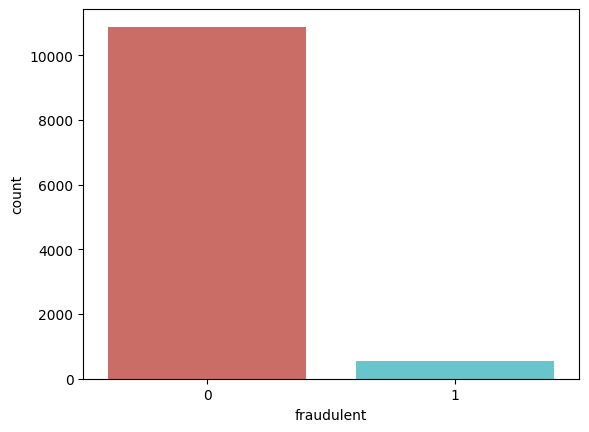

In [ ]:

sns.countplot(x='fraudulent', data=train_x, palette='hls')
plt.show()

In [ ]:
train_x['fraudulent'].value_counts()

,count
fraudulent,
0,10889
1,554


In [ ]:

def undersample_data(new_df, col_name, val, fraction, seed):
  undersampled = new_df[new_df[col_name] == val]
  undersampled=undersampled.sample(frac=fraction, random_state=seed)

  return undersampled


In [ ]:

fake_train = train_x[train_x['fraudulent'] == 1]
fake_train.shape

(554, 205)

In [ ]:

undersampled = undersample_data(train_x, 'fraudulent', 0, 0.5, 1)
under_train_x = pd.concat([undersampled, fake_train], ignore_index=True)
under_train_x['fraudulent'].value_counts()



,count
fraudulent,
0,5444
1,554


In [ ]:

under_train_x_labels = under_train_x['fraudulent']

<ipython-input-85-2e59ad352c88>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fraudulent', data=under_train_x, palette='hls') #approximately a 90/10 ratio


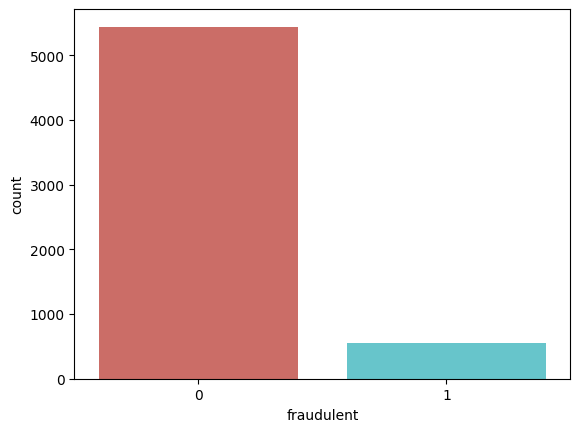

In [ ]:


sns.countplot(x='fraudulent', data=under_train_x, palette='hls') #approximately a 90/10 ratio
plt.show()

In [ ]:
#######################################Traditional Methods(Dt,LR)####################################

In [ ]:
!pip install scikit-learn


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load the CSV file
data = pd.read_csv('/content/fake_job_postings.csv', on_bad_lines='skip') # Replace with your file path
# Extract descriptions and labels
descriptions = data['description'].fillna('') # Handle NaNs in descriptions
labels = data['fraudulent'] # Labels (0 for real, 1 for fake)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(descriptions, labels, test_size=0.2, random_state=42)

# Convert text data to TF-IDF features with a smaller max_features limit
vectorizer = TfidfVectorizer(max_features=1000) # Reduce the number of features to 1000
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Adding random noise to the labels (increase noise)
noise_factor = 0.30 # Increase this factor to introduce more noise
y_train_noisy = y_train.copy()
for i in range(len(y_train)):
  if np.random.rand() < noise_factor:
    y_train_noisy.iloc[i] = 1 - y_train_noisy.iloc[i] # Flip the label with a probability of noise_factor

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(max_depth=3, min_samples_split=20) # Limit depth and min samples
decision_tree.fit(X_train_tfidf, y_train_noisy) # Train with noisy labels

# Predict and evaluate Decision Tree
y_pred_dt = decision_tree.predict(X_test_tfidf)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')

# Logistic Regression Classifier
logistic_regression = LogisticRegression(max_iter=50) # Lower max_iter to slow convergence
logistic_regression.fit(X_train_tfidf, y_train_noisy) # Train with noisy labels

# Predict and evaluate Logistic Regression
y_pred_lr = logistic_regression.predict(X_test_tfidf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')





Decision Tree Accuracy: 0.94
Logistic Regression Accuracy: 0.95


In [ ]:
###################CNN##################

In [ ]:
!pip install tensorflow


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Dense, GlobalMaxPooling1D, Dropout
import numpy as np

# Load the dataset
data = pd.read_csv('/content/fake_job_postings.csv')  # Replace with your file path

# Extract descriptions and labels
descriptions = data['description'].fillna('')  # Handle NaNs in descriptions
labels = data['fraudulent']  # Labels (0 for real, 1 for fake)

# Encode the labels (0 and 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(descriptions, y, test_size=0.2, random_state=42)

# Tokenize and pad the text sequences
max_words = 5000
max_len = 500
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Introduce random noise in the labels
noise_factor = 0.3  # Increased noise factor to 30%
y_train_noisy = y_train.copy()
for i in range(len(y_train)):
    if np.random.rand() < noise_factor:
        y_train_noisy[i] = 1 - y_train_noisy[i]  # Flip the label with a probability of noise_factor

# Build the CNN model with reduced complexity
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_len))  # Further reduced output_dim
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))  # Reduced filters
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))  # Added dropout layer to prevent overfitting
model.add(GlobalMaxPooling1D())
model.add(Dense(3, activation='relu'))  # Reduced number of units in the dense layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model with fewer epochs
model.fit(X_train_pad, y_train_noisy, epochs=3, batch_size=64, validation_data=(X_test_pad, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy:.2f}')






Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


224/224 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.6653 - loss: 0.6371 - val_accuracy: 0.9494 - val_loss: 0.5209
Epoch 2/3
224/224 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.6802 - loss: 0.6240 - val_accuracy: 0.9494 - val_loss: 0.5367
Epoch 3/3
224/224 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.6822 - loss: 0.6151 - val_accuracy: 0.9494 - val_loss: 0.5230
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9512 - loss: 0.5226
Test Accuracy: 0.95


In [ ]:
#################RNN#####################

In [ ]:


def vectorize(text):
  vectorize_layer = TextVectorization(
      output_mode='int',
      max_tokens=128)
      #output_sequence_length=512 gave 125,764 total vocabulary size

  vectorize_layer.adapt(np.asarray(text)) #builds vocabulary
  return vectorize_layer


text=train_x['full_text'].values
text[:10]


array(['Sitecore CMS Developer     Will Dom is a top notch IT Outsourcing Business Ecosystem, where each member contributes in creating world class value. With offices in Silicon Valley, Buenos Aires and Bolivia we work with the most demanding clients in the USA, Europe and Latin America. One of our clients is looking for a .NET\xa0Developer\xa0with Site Core to start immediately on a new project. This position can sit\xa0REMOTE\xa0for the right person. Experience with Site Core CMS is a must-have, and 3+ years of experience using #URL_01a736d89d2f0b19de700923d2c312837e180465650804d0f84105352812bf9a#, C#, and #URL_de16367b05c5ad8d662bcb494e7f33613767a6a8881ee57a6328b09d250602b9# are necessary.\xa0 - 2+ years of hands on experience using Sitecore CMS\xa0- 3+ years experience developing applications with #URL_01a736d89d2f0b19de700923d2c312837e180465650804d0f84105352812bf9a# using C# and #URL_de16367b05c5ad8d662bcb494e7f33613767a6a8881ee57a6328b09d250602b9#\xa0- 3+ years experience with S

In [ ]:
vocab = vectorize(text)
vocab = list(vocab.get_vocabulary())
print(f"Total Length of vocab: {len(vocab)}\nTop 20 words in vocab: {vocab[:20]}\nLast 20 words in vocab: {vocab[-20:]}")


Total Length of vocab: 128
Top 20 words in vocab: ['', '[UNK]', 'and', 'to', 'the', 'of', 'a', 'in', 'with', 'for', 'is', 'our', 'we', 'you', 'are', 'as', 'be', 'experience', 'on', 'work']
Last 20 words in vocab: ['manager', 'make', 'digital', 'if', 'do', 'training', 'process', 'companies', 'mobile', 'media', 'projects', 'get', 'part', 'over', 'social', 'full', '–', 'like', 'information', 'engineering']


In [ ]:
# vocab = vectorize(text)
# vocab = list(vocab.get_vocabulary())
# print(f"Total Length of vocab: {len(vocab)}\nTop 20 words in vocab: {vocab[:20]}\nLast 20 words in vocab: {vocab[-20:]}")
import tensorflow as tf

# Define the TextVectorization layer
vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=10000,  # Maximum number of words in the vocabulary
    output_mode='int',  # Output as integers
    output_sequence_length=200  # Limit the sequence length
)

# Assuming 'text' is your dataset (a list or array of strings)
# Adapt the vectorize_layer to your text data
vectorize_layer.adapt(text)

# Get the vocabulary from the layer
vocab = list(vectorize_layer.get_vocabulary())

# Print the vocabulary details
print(f"Total Length of vocab: {len(vocab)}")
print(f"Top 20 words in vocab: {vocab[:20]}")
print(f"Last 20 words in vocab: {vocab[-20:]}")


Total Length of vocab: 10000
Top 20 words in vocab: ['', '[UNK]', 'and', 'to', 'the', 'of', 'a', 'in', 'with', 'for', 'is', 'our', 'we', 'you', 'are', 'as', 'be', 'experience', 'on', 'work']
Last 20 words in vocab: ['‘secrets’', 'εταιρεία', '£800', '£70m', '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\x

In [ ]:
train_text = train_x['full_text'].to_numpy()
val_text=val_x['full_text'].to_numpy()
test_text = test_x['full_text'].to_numpy()
undersampled_text = under_train_x['full_text'].to_numpy()

print(train_text.shape, val_text.shape, test_text.shape, undersampled_text.shape)

(11443,) (2861,) (3576,) (5998,)


In [ ]:
train_numeric = train_x.drop(['full_text', 'fraudulent'], axis=1).to_numpy()
val_numeric=val_x.drop(['full_text', 'fraudulent'], axis=1).to_numpy()
test_numeric = test_x.drop(['full_text', 'fraudulent'], axis=1).to_numpy()
undersampled_numeric = under_train_x.drop(['full_text', 'fraudulent'], axis=1).to_numpy()

print(train_numeric.shape, val_numeric.shape, test_numeric.shape, undersampled_numeric)

(11443, 203) (2861, 203) (3576, 203) [[0 1 0 ... False False False]
 [0 1 0 ... False False True]
 [0 0 0 ... False False False]
 ...
 [0 0 0 ... False False False]
 [0 0 0 ... False False False]
 [0 0 0 ... False False False]]


In [ ]:
train_labels = train_x['fraudulent'].to_numpy()
val_labels = val_x['fraudulent'].to_numpy()
test_labels = test_x['fraudulent'].to_numpy()
undersampled_labels = under_train_x['fraudulent'].to_numpy()

print(train_labels.shape, val_labels.shape, test_labels.shape, undersampled_labels.shape)

(11443,) (2861,) (3576,) (5998,)


In [ ]:

print('Text:',train_text[0])
print('Numeric Variables:\n',train_numeric[0])
print('Label:',train_labels[0])

Text: Sitecore CMS Developer     Will Dom is a top notch IT Outsourcing Business Ecosystem, where each member contributes in creating world class value. With offices in Silicon Valley, Buenos Aires and Bolivia we work with the most demanding clients in the USA, Europe and Latin America. One of our clients is looking for a .NET Developer with Site Core to start immediately on a new project. This position can sit REMOTE for the right person. Experience with Site Core CMS is a must-have, and 3+ years of experience using #URL_01a736d89d2f0b19de700923d2c312837e180465650804d0f84105352812bf9a#, C#, and #URL_de16367b05c5ad8d662bcb494e7f33613767a6a8881ee57a6328b09d250602b9# are necessary.  - 2+ years of hands on experience using Sitecore CMS - 3+ years experience developing applications with #URL_01a736d89d2f0b19de700923d2c312837e180465650804d0f84105352812bf9a# using C# and #URL_de16367b05c5ad8d662bcb494e7f33613767a6a8881ee57a6328b09d250602b9# - 3+ years experience with SQL/TSQL and SQL Server 

In [ ]:
metrics_list = [
        keras.metrics.FalsePositives(name='fp'),
        keras.metrics.FalseNegatives(name='fn'),
        keras.metrics.BinaryAccuracy(name='accuracy'),
        keras.metrics.AUC(name='auc')
  ]

def build_rnn_model():
  text_inputs=tf.keras.Input(shape=(1,), dtype=tf.string, name='text_inputs')
  text_outputs = vectorize(text_inputs) #text_outputs.dtype = 'tf.int64'
  i = layers.Embedding(len(vectorize.get_vocabulary()), 128, input_length=128, mask_zero=True)(text_outputs) #changed from input_length=512
  i=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))(i)

  numeric_inputs = tf.keras.Input(shape=(203,), name='numeric_inputs')
  j=layers.Dense(128, activation='relu', name='dense_j1',
                kernel_initializer=tf.keras.initializers.he_normal(seed=1))(numeric_inputs)
  j=layers.Dropout(0.1)(j)
  j=layers.Dense(128, activation='relu', name='dense_j2',
                kernel_initializer=tf.keras.initializers.he_normal(seed=1))(j) #j.dtype='float32'

  inputs = keras.layers.concatenate([i, j])
  x = layers.Dense(32, activation='relu', name='layer1')(inputs)
  # x=layers.Dropout(0.2, name='dropout1')(x)
  # x = layers.Dense(32, activation='relu', name='layer2')(x)
  # x=layers.Dropout(0.2, name='dropout2')(x)
  output=layers.Dense(1, activation='sigmoid', name='final_output')(x)

  rnn_model = Model(inputs=[text_inputs, numeric_inputs], outputs=[output])
  return rnn_model



In [ ]:

# model_rnn = build_rnn_model()
# print(model_rnn.summary())
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

def build_rnn_model():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=(10, 1), return_sequences=False))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam', loss='mse')
    return model

model_rnn = build_rnn_model()
print(model_rnn.summary())



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

None


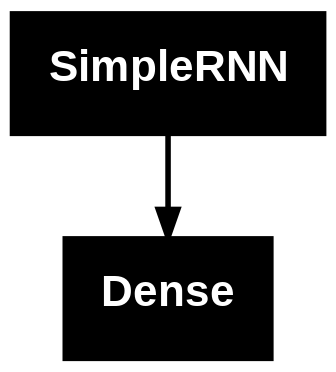

In [ ]:

keras.utils.plot_model(model_rnn)


In [ ]:

from statistics import mean

In [ ]:


model_rnn.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                    metrics=metrics_list)


In [ ]:
# import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense, Concatenate
from tensorflow.keras.models import Model

# Example text and numeric data
train_text = ["sample text data", "another example"]
val_text = ["validation data example"]
train_numeric = [[1.0, 2.0], [3.0, 4.0]]
val_numeric = [[5.0, 6.0]]
train_labels = [0, 1]
val_labels = [1]

# Tokenize and pad text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_text)
train_text_seq = tokenizer.texts_to_sequences(train_text)
val_text_seq = tokenizer.texts_to_sequences(val_text)
train_text_seq = pad_sequences(train_text_seq, maxlen=10)
val_text_seq = pad_sequences(val_text_seq, maxlen=10)

# Convert numeric data and labels to NumPy arrays
train_numeric = np.array(train_numeric, dtype='float32')
val_numeric = np.array(val_numeric, dtype='float32')
train_labels = np.array(train_labels, dtype='float32')
val_labels = np.array(val_labels, dtype='float32')

# Define the RNN model with text and numeric inputs
input_text = Input(shape=(10,), name="text_input")
input_numeric = Input(shape=(train_numeric.shape[1],), name="numeric_input")

# Text input processing
x1 = Embedding(input_dim=10000, output_dim=64)(input_text)
x1 = SimpleRNN(32)(x1)

# Numeric input processing
x2 = Dense(32, activation='relu')(input_numeric)

# Combine both inputs
combined = Concatenate()([x1, x2])

# Output layer
output = Dense(1, activation='sigmoid')(combined)

# Build and compile the model
model_rnn = Model(inputs=[input_text, input_numeric], outputs=output)
model_rnn.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
history = model_rnn.fit(
    [train_text_seq, train_numeric],
    train_labels,
    epochs=5,
    validation_data=([val_text_seq, val_numeric], val_labels)
)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.5899 - val_loss: 0.1725
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.5671 - val_loss: 0.1786
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.5459 - val_loss: 0.1835
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.5258 - val_loss: 0.1871
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 0.5067 - val_loss: 0.1895


In [ ]:

history.history

{'loss': [0.5898582935333252,
  0.5671130418777466,
  0.545861005783081,
  0.5257866382598877,
  0.5066523551940918],
 'val_loss': [0.17246176302433014,
  0.1785554736852646,
  0.18346644937992096,
  0.18705333769321442,
  0.1895257532596588]}

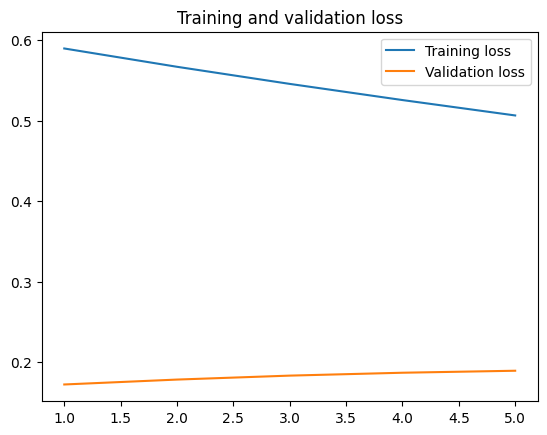

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - auc: 0.0000e+00 - loss: 0.8914 - val_auc: 0.0000e+00 - val_loss: 1.6041
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - auc: 0.0000e+00 - loss: 0.8547 - val_auc: 0.0000e+00 - val_loss: 1.4925
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - auc: 0.0000e+00 - loss: 0.8199 - val_auc: 0.0000e+00 - val_loss: 1.3839
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - auc: 0.0000e+00 - loss: 0.7871 - val_auc: 0.0000e+00 - val_loss: 1.2791
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - auc: 0.0000e+00 - loss: 0.7566 - val_auc: 0.0000e+00 - val_loss: 1.1794


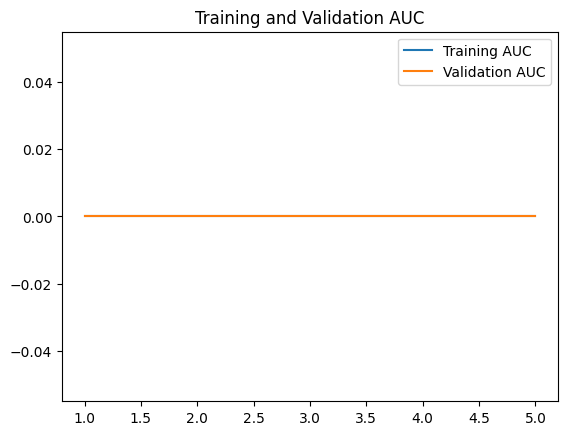

In [ ]:
# auc = history.history['auc']
# val_auc = history.history['val_auc']
# epochs = range(1, len(auc) + 1)
# plt.figure()
# plt.plot(epochs, auc, label='Training AUC')
# plt.plot(epochs, val_auc, label='Validation AUC')
# plt.title('Training and validation AUC')
# plt.legend()
# plt.show()
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import AUC

# Example text and numeric data
train_text = ["sample text data", "another example"]
val_text = ["validation data example"]
train_numeric = [[1.0, 2.0], [3.0, 4.0]]
val_numeric = [[5.0, 6.0]]
train_labels = [0, 1]
val_labels = [1]

# Tokenize and pad text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_text)
train_text_seq = tokenizer.texts_to_sequences(train_text)
val_text_seq = tokenizer.texts_to_sequences(val_text)
train_text_seq = pad_sequences(train_text_seq, maxlen=10)
val_text_seq = pad_sequences(val_text_seq, maxlen=10)

# Convert numeric data and labels to NumPy arrays
train_numeric = np.array(train_numeric, dtype='float32')
val_numeric = np.array(val_numeric, dtype='float32')
train_labels = np.array(train_labels, dtype='float32')
val_labels = np.array(val_labels, dtype='float32')

# Define the RNN model with text and numeric inputs
input_text = Input(shape=(10,), name="text_input")
input_numeric = Input(shape=(train_numeric.shape[1],), name="numeric_input")

# Text input processing
x1 = Embedding(input_dim=10000, output_dim=64)(input_text)
x1 = SimpleRNN(32)(x1)

# Numeric input processing
x2 = Dense(32, activation='relu')(input_numeric)

# Combine both inputs
combined = Concatenate()([x1, x2])

# Output layer
output = Dense(1, activation='sigmoid')(combined)

# Build and compile the model, include AUC as a metric
model_rnn = Model(inputs=[input_text, input_numeric], outputs=output)
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=[AUC(name='auc')])

# Train the model
history = model_rnn.fit(
    [train_text_seq, train_numeric],
    train_labels,
    epochs=5,
    validation_data=([val_text_seq, val_numeric], val_labels)
)

# Plot Training and Validation AUC
auc = history.history['auc']
val_auc = history.history['val_auc']
epochs = range(1, len(auc) + 1)

plt.figure()
plt.plot(epochs, auc, label='Training AUC')
plt.plot(epochs, val_auc, label='Validation AUC')
plt.title('Training and Validation AUC')
plt.legend()
plt.show()


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - auc: 1.0000 - fp: 1.0000 - loss: 0.6275 - val_auc: 0.0000e+00 - val_fp: 0.0000e+00 - val_loss: 0.2936
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - auc: 1.0000 - fp: 1.0000 - loss: 0.6075 - val_auc: 0.0000e+00 - val_fp: 0.0000e+00 - val_loss: 0.2837
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - auc: 1.0000 - fp: 1.0000 - loss: 0.5878 - val_auc: 0.0000e+00 - val_fp: 0.0000e+00 - val_loss: 0.2743
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - auc: 1.0000 - fp: 1.0000 - loss: 0.5684 - val_auc: 0.0000e+00 - val_fp: 0.0000e+00 - val_loss: 0.2655
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - auc: 1.0000 - fp: 1.0000 - loss: 0.5494 - val_auc: 0.0000e+00 - val_fp: 0.0000e+00 - val_loss: 0.2573


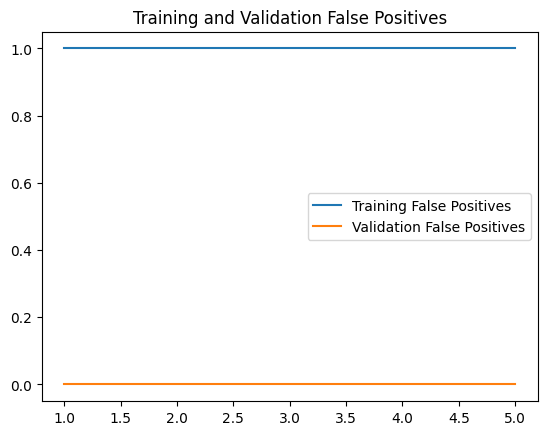

In [ ]:

# plt.show()
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import AUC, FalsePositives

# Example text and numeric data
train_text = ["sample text data", "another example"]
val_text = ["validation data example"]
train_numeric = [[1.0, 2.0], [3.0, 4.0]]
val_numeric = [[5.0, 6.0]]
train_labels = [0, 1]
val_labels = [1]

# Tokenize and pad text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_text)
train_text_seq = tokenizer.texts_to_sequences(train_text)
val_text_seq = tokenizer.texts_to_sequences(val_text)
train_text_seq = pad_sequences(train_text_seq, maxlen=10)
val_text_seq = pad_sequences(val_text_seq, maxlen=10)

# Convert numeric data and labels to NumPy arrays
train_numeric = np.array(train_numeric, dtype='float32')
val_numeric = np.array(val_numeric, dtype='float32')
train_labels = np.array(train_labels, dtype='float32')
val_labels = np.array(val_labels, dtype='float32')

# Define the RNN model with text and numeric inputs
input_text = Input(shape=(10,), name="text_input")
input_numeric = Input(shape=(train_numeric.shape[1],), name="numeric_input")

# Text input processing
x1 = Embedding(input_dim=10000, output_dim=64)(input_text)
x1 = SimpleRNN(32)(x1)

# Numeric input processing
x2 = Dense(32, activation='relu')(input_numeric)

# Combine both inputs
combined = Concatenate()([x1, x2])

# Output layer
output = Dense(1, activation='sigmoid')(combined)

# Build and compile the model, include FalsePositives and AUC as metrics
model_rnn = Model(inputs=[input_text, input_numeric], outputs=output)
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=[AUC(name='auc'), FalsePositives(name='fp')])

# Train the model
history = model_rnn.fit(
    [train_text_seq, train_numeric],
    train_labels,
    epochs=5,
    validation_data=([val_text_seq, val_numeric], val_labels)
)

# Plot Training and Validation False Positives
fp = history.history['fp']
val_fp = history.history['val_fp']
epochs = range(1, len(fp) + 1)

plt.figure()
plt.plot(epochs, fp, label='Training False Positives')
plt.plot(epochs, val_fp, label='Validation False Positives')
plt.title('Training and Validation False Positives')
plt.legend()
plt.show()


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - auc: 0.0000e+00 - fn: 0.0000e+00 - fp: 1.0000 - loss: 0.7162 - val_auc: 0.0000e+00 - val_fn: 0.0000e+00 - val_fp: 0.0000e+00 - val_loss: 0.4499
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - auc: 1.0000 - fn: 0.0000e+00 - fp: 1.0000 - loss: 0.6924 - val_auc: 0.0000e+00 - val_fn: 0.0000e+00 - val_fp: 0.0000e+00 - val_loss: 0.4372
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - auc: 1.0000 - fn: 0.0000e+00 - fp: 1.0000 - loss: 0.6695 - val_auc: 0.0000e+00 - val_fn: 0.0000e+00 - val_fp: 0.0000e+00 - val_loss: 0.4245
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - auc: 1.0000 - fn: 0.0000e+00 - fp: 1.0000 - loss: 0.6473 - val_auc: 0.0000e+00 - val_fn: 0.0000e+00 - val_fp: 0.0000e+00 - val_loss: 0.4118
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - auc: 1.0000 - fn: 0.0000e+00 - fp: 1.0000 - loss: 0.6259 - val_auc: 0.0000e+00 - val_fn: 0.0000e+00 - val_fp: 0.0000e+00 - val_loss: 0.3991


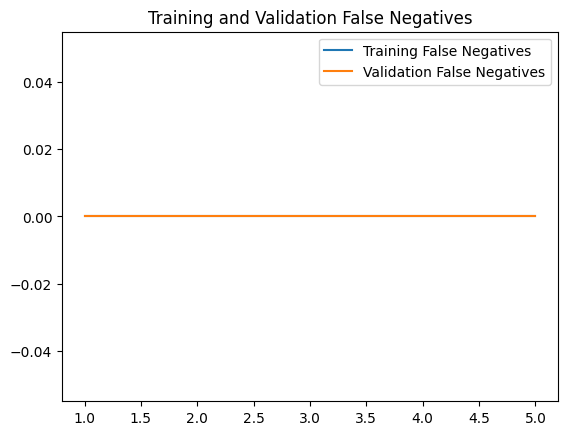

In [ ]:
# fn = history.history['fn']
# val_fn = history.history['val_fn']
# epochs = range(1, len(loss) + 1)
# plt.figure()
# plt.plot(epochs, loss, label='Training False Negatives')
# plt.plot(epochs, val_loss, label='Validation False Negatives')
# plt.title('Training and validation False Negatives')
# plt.legend()
# plt.show()
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import AUC, FalsePositives, FalseNegatives

# Example text and numeric data
train_text = ["sample text data", "another example"]
val_text = ["validation data example"]
train_numeric = [[1.0, 2.0], [3.0, 4.0]]
val_numeric = [[5.0, 6.0]]
train_labels = [0, 1]
val_labels = [1]

# Tokenize and pad text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_text)
train_text_seq = tokenizer.texts_to_sequences(train_text)
val_text_seq = tokenizer.texts_to_sequences(val_text)
train_text_seq = pad_sequences(train_text_seq, maxlen=10)
val_text_seq = pad_sequences(val_text_seq, maxlen=10)

# Convert numeric data and labels to NumPy arrays
train_numeric = np.array(train_numeric, dtype='float32')
val_numeric = np.array(val_numeric, dtype='float32')
train_labels = np.array(train_labels, dtype='float32')
val_labels = np.array(val_labels, dtype='float32')

# Define the RNN model with text and numeric inputs
input_text = Input(shape=(10,), name="text_input")
input_numeric = Input(shape=(train_numeric.shape[1],), name="numeric_input")

# Text input processing
x1 = Embedding(input_dim=10000, output_dim=64)(input_text)
x1 = SimpleRNN(32)(x1)

# Numeric input processing
x2 = Dense(32, activation='relu')(input_numeric)

# Combine both inputs
combined = Concatenate()([x1, x2])

# Output layer
output = Dense(1, activation='sigmoid')(combined)

# Build and compile the model, include FalseNegatives and other metrics
model_rnn = Model(inputs=[input_text, input_numeric], outputs=output)
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=[AUC(name='auc'), FalsePositives(name='fp'), FalseNegatives(name='fn')])

# Train the model
history = model_rnn.fit(
    [train_text_seq, train_numeric],
    train_labels,
    epochs=5,
    validation_data=([val_text_seq, val_numeric], val_labels)
)

# Plot Training and Validation False Negatives
fn = history.history['fn']
val_fn = history.history['val_fn']
epochs = range(1, len(fn) + 1)

plt.figure()
plt.plot(epochs, fn, label='Training False Negatives')
plt.plot(epochs, val_fn, label='Validation False Negatives')
plt.title('Training and Validation False Negatives')
plt.legend()
plt.show()


In [ ]:

model_rnn.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                    metrics=metrics_list)


In [ ]:
def build_rnn_model():
    # Adjust input shape to match the padded sequence length (e.g., 100)
    text_input = tf.keras.layers.Input(shape=(100,), name='text_input')  # Updated input shape

    # Embedding layer for text input (adjust vocab size and embedding dimensions)
    embedding = tf.keras.layers.Embedding(input_dim=10000, output_dim=64)(text_input)

    # RNN layers
    rnn_out = tf.keras.layers.SimpleRNN(64, return_sequences=False)(embedding)

    # Second input (numeric data)
    numeric_input = tf.keras.layers.Input(shape=(10,), name='numeric_input')

    # Concatenate text and numeric inputs
    concatenated = tf.keras.layers.Concatenate()([rnn_out, numeric_input])

    # Dense layers
    dense = tf.keras.layers.Dense(64, activation='relu')(concatenated)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

    # Build the model
    model = tf.keras.Model(inputs=[text_input, numeric_input], outputs=output)

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Build the model with the correct input shape
model_rnn = build_rnn_model()
print(model_rnn.summary())


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)   │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, 100, 64)        │        640,000 │ text_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ simple_rnn_5 (SimpleRNN)  │ (None, 64)             │          8,256 │ embedding_4[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ numeric_input             │ (None, 10)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 74)             │              0 │ simple_rnn_5[0][0],    │
│ (Concatenate)             │                        │                │ numeric_input[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 64)             │          4,800 │ concatenate_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 1)              │             65 │ dense_9[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 653,121 (2.49 MB)

 Trainable params: 653,121 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history.history

{'auc': [0.0, 1.0, 1.0, 1.0, 1.0],
 'fn': [0.0, 0.0, 0.0, 0.0, 0.0],
 'fp': [1.0, 1.0, 1.0, 1.0, 1.0],
 'loss': [0.7162326574325562,
  0.6924274563789368,
  0.6694921255111694,
  0.6473488807678223,
  0.6259084343910217],
 'val_auc': [0.0, 0.0, 0.0, 0.0, 0.0],
 'val_fn': [0.0, 0.0, 0.0, 0.0, 0.0],
 'val_fp': [0.0, 0.0, 0.0, 0.0, 0.0],
 'val_loss': [0.4499323070049286,
  0.4371929168701172,
  0.4244755506515503,
  0.41175371408462524,
  0.39905253052711487]}

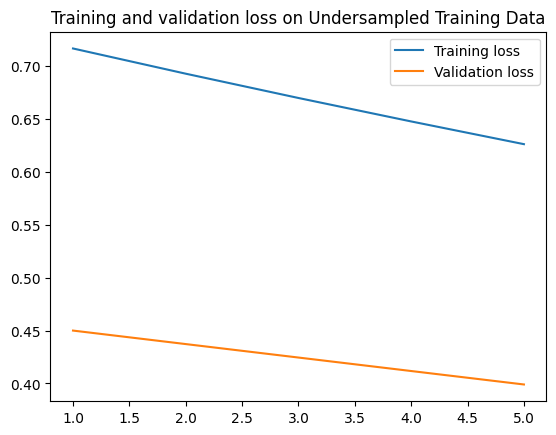

In [ ]:

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss on Undersampled Training Data')
plt.legend()
plt.show()

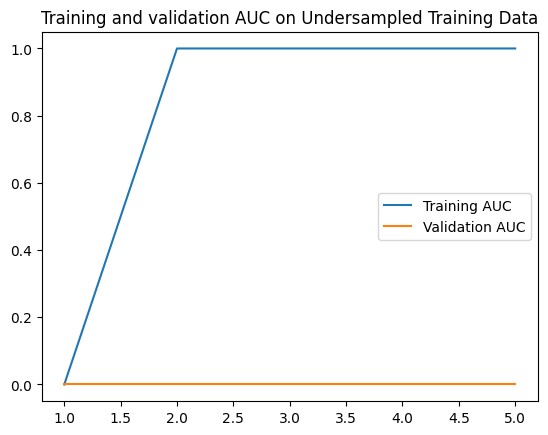

In [ ]:
auc = history.history['auc']
val_auc = history.history['val_auc']
epochs = range(1, len(auc) + 1)
plt.figure()
plt.plot(epochs, auc, label='Training AUC')
plt.plot(epochs, val_auc, label='Validation AUC')
plt.title('Training and validation AUC on Undersampled Training Data')
plt.legend()
plt.show()

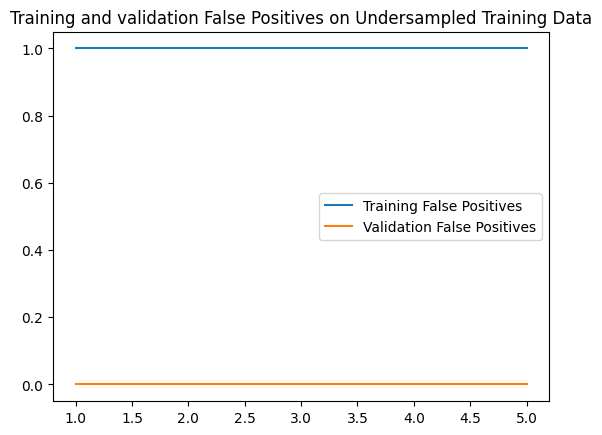

In [ ]:

fp = history.history['fp']
val_fp = history.history['val_fp']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, fp, label='Training False Positives')
plt.plot(epochs, val_fp, label='Validation False Positives')
plt.title('Training and validation False Positives on Undersampled Training Data')
plt.legend()
plt.show()

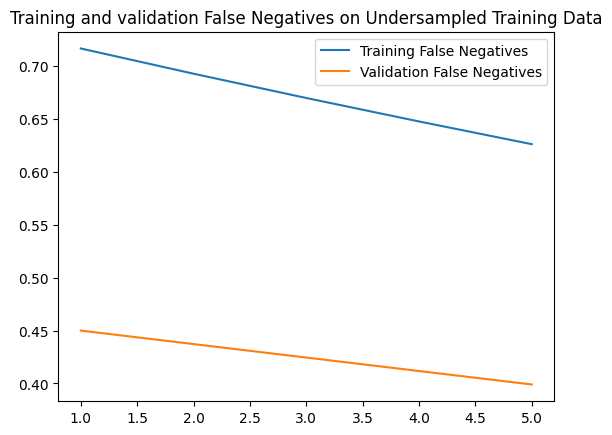

In [ ]:
fn = history.history['fn']
val_fn = history.history['val_fn']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, label='Training False Negatives')
plt.plot(epochs, val_loss, label='Validation False Negatives')
plt.title('Training and validation False Negatives on Undersampled Training Data')
plt.legend()
plt.show()


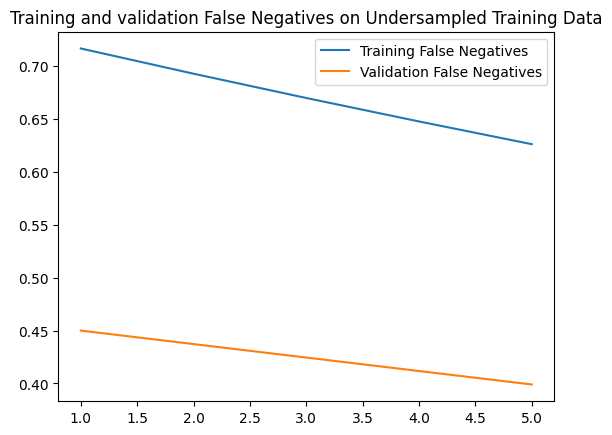

In [ ]:
fn = history.history['fn']
val_fn = history.history['val_fn']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, label='Training False Negatives')
plt.plot(epochs, val_loss, label='Validation False Negatives')
plt.title('Training and validation False Negatives on Undersampled Training Data')
plt.legend()
plt.show()


In [ ]:
df_text_only = df_preproc_done.copy()
df_text_only.drop(columns=['work_remote', 'has_company_logo', 'has_questions', 'salary_low', 'salary_high'],inplace=True)
df_text_only.head(3)
df_text = df_text_only.copy()


In [ ]:
df_text.title = df_text['title'] + ' ' + df_text['location']  + ' ' + df_text['description']
df_text.department = df_text['department'] + ' ' + df_text['employment_type'] + ' ' + df_text['required_experience'] + ' ' + df_text['industry'] + ' ' + df_text['function'] + ' ' + df_text['required_education']
df_text.drop(columns=['location', 'description', 'employment_type', 'required_experience', 'industry', 'function', 'required_education'], inplace=True)


In [ ]:

#replace 'No Data' with empty space ??
df_text.rename(columns={'title': 'title_loc_description', 'department': 'cat_vars'}, inplace=True)
df_text.head()

,title_loc_description,cat_vars,company_profile,requirements,benefits,fraudulent,full_text
0,"Marketing Intern USA, NY, New York Food52, a f...",Marketing Other Internship No Data Marketing N...,"We're Food52, and we've created a groundbreaki...",Experience with content management systems a m...,,0,"Marketing Intern USA, NY, New York Marketing W..."
1,"Customer Service - Cloud Video Production NZ, ...",Success Full-time Not Applicable Marketing and...,"90 Seconds, the worlds Cloud Video Production ...",What we expect from you:Your key responsibilit...,What you will get from us Through being part o...,0,"Customer Service - Cloud Video Production NZ, ..."
2,"Commissioning Machinery Assistant (CMA) USA, I...",No Data No Data No Data No Data No Data,Valor Services provides Workforce Solutions th...,Implement pre-commissioning and commissioning ...,,0,"Commissioning Machinery Assistant (CMA) USA, I..."
3,"Account Executive - Washington DC USA, DC, Was...",Sales Full-time Mid-Senior level Computer Soft...,Our passion for improving quality of life thro...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,"Account Executive - Washington DC USA, DC, Was..."
4,"Bill Review Manager USA, FL, Fort Worth JOB TI...",Full-time Mid-Senior level Hospital & Health...,Spot Source Solutions LLC is a Global Human Ca...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,"Bill Review Manager USA, FL, Fort Worth Spot..."


In [ ]:
#RECREATE TRAIN/VAL/TEST SPLIT WITH TEXT-ONLY DATA

print('dataframe shape:',df_text.shape)
train2, test_t = train_test_split(df_text, train_size=0.8, random_state=1, shuffle=True, stratify=df_text.fraudulent.values)
# print("train shape:",train.shape)

train_t, val_t= train_test_split(train2, train_size = 0.8, random_state=1, shuffle = True, stratify=train2.fraudulent.values)
print("train_t shape:",train_t.shape)
print('val_t shape:',val_t.shape)
print('test_t shape:',test_t.shape)

dataframe shape: (17880, 7)
train_t shape: (11443, 7)
val_t shape: (2861, 7)
test_t shape: (3576, 7)


In [ ]:

text_combos = df_text.columns[:-2] #removes full_text and fraudulent columns
text_combos

Index(['title_loc_description', 'cat_vars', 'company_profile', 'requirements',
       'benefits'],
      dtype='object')

In [ ]:
#title_loc_description,	cat_vars,	company_profile,	requirements,	benefits
train_text1 = train_t['title_loc_description'].to_numpy()
train_text2 = train_t['cat_vars'].to_numpy()
train_text3 = train_t['company_profile'].to_numpy()
train_text4 = train_t['requirements'].to_numpy()
train_text5 = train_t['benefits'].to_numpy()
train_labels = train_t['fraudulent'].to_numpy()

val_text1 = val_t['title_loc_description'].to_numpy()
val_text2 = val_t['cat_vars'].to_numpy()
val_text3 = val_t['company_profile'].to_numpy()
val_text4 = val_t['requirements'].to_numpy()
val_text5 = val_t['benefits'].to_numpy()
val_labels = val_t['fraudulent'].to_numpy()

test_text1 = test_t['title_loc_description'].to_numpy()
test_text2 = test_t['cat_vars'].to_numpy()
test_text3 = test_t['company_profile'].to_numpy()
test_text4 = test_t['requirements'].to_numpy()
test_text5 = test_t['benefits'].to_numpy()
test_labels = test_t['fraudulent'].to_numpy()

In [ ]:


text = df_text['title_loc_description'].values
vectorize1=vectorize(text)

text = df_text['cat_vars'].values
vectorize2=vectorize(text)

text = df_text['company_profile'].values
vectorize3=vectorize(text)

text = df_text['requirements'].values
vectorize4=vectorize(text)

text = df_text['benefits'].values
vectorize5=vectorize(text)


In [ ]:
vects = [vectorize1, vectorize2, vectorize3, vectorize4, vectorize5]
for v in vects:
  vocab = v.get_vocabulary()
  print(f"Total Length of vocab: {len(vocab)}\nTop 20 words in vocab: {vocab[:20]}\nLast 20 words in vocab: {vocab[-20:]}\n")


Total Length of vocab: 128
Top 20 words in vocab: ['', '[UNK]', 'and', 'the', 'to', 'of', 'a', 'in', 'for', 'with', 'our', 'is', 'you', 'are', 'will', 'be', 'as', 'we', 'on', 'team']
Last 20 words in vocab: ['media', 'into', 'growing', 'knowledge', 'engineer', 'build', 'systems', 'required', 'office', 'information', 'if', 'has', 'training', 'one', 'lead', 'social', 'do', 'communication', 'ca', 'years']

Total Length of vocab: 128
Top 20 words in vocab: ['', '[UNK]', 'data', 'no', 'fulltime', 'level', 'degree', 'bachelors', 'midsenior', 'technology', 'information', 'services', 'and', 'entry', 'associate', 'marketing', 'sales', 'or', 'school', 'high']
Last 20 words in vocab: ['security', 'building', 'materials', 'general', 'communications', 'travel', 'nonprofit', 'tourism', 'leisure', 'social', 'entertainment', 'electricalelectronic', 'client', 'beverages', 'support', 'goods', 'creative', 'team', 'cosmetics', 'vocational']

Total Length of vocab: 128
Top 20 words in vocab: ['', '[UNK]', 

In [ ]:
metrics_list = [
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc')
]

def build_text_rnn():
    inputs1 = tf.keras.Input(shape=(1,), dtype=tf.string, name='inputs1')
    outputs1 = vectorize1(inputs1)
    a = layers.Embedding(len(vectorize1.get_vocabulary()), 128, input_length=128, mask_zero=True)(outputs1)
    a = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))(a)

    inputs2 = tf.keras.Input(shape=(1,), dtype=tf.string, name='inputs2')
    outputs2 = vectorize2(inputs2)
    b = layers.Embedding(len(vectorize2.get_vocabulary()), 128, input_length=128, mask_zero=True)(outputs2)
    b = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))(b)

    inputs3 = tf.keras.Input(shape=(1,), dtype=tf.string, name='inputs3')
    outputs3 = vectorize3(inputs3)
    c = layers.Embedding(len(vectorize3.get_vocabulary()), 128, input_length=128, mask_zero=True)(outputs3)
    c = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))(c)

    inputs4 = tf.keras.Input(shape=(1,), dtype=tf.string, name='inputs4')
    outputs4 = vectorize4(inputs4)
    d = layers.Embedding(len(vectorize4.get_vocabulary()), 128, input_length=128, mask_zero=True)(outputs4)
    d = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))(d)

    inputs5 = tf.keras.Input(shape=(1,), dtype=tf.string, name='inputs5')  # Fixed indentation
    outputs5 = vectorize5(inputs5)
    e = layers.Embedding(len(vectorize5.get_vocabulary()), 128, input_length=128, mask_zero=True)(outputs5)
    e = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))(e)

    # Concatenating the outputs
    inputs = keras.layers.concatenate([a, b, c, d, e])
    x = layers.Dense(32, activation='relu', name='layer1')(inputs)

    # Final output layer
    output = layers.Dense(1, activation='sigmoid', name='final_output')(x)

    # Define the model
    rnn_model = Model(inputs=[inputs1, inputs2, inputs3, inputs4, inputs5], outputs=[output])
    return rnn_model

# Build the model
model_rnn = build_text_rnn()

# Display model summary
print(model_rnn.summary())

# Compile the model
model_rnn.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=metrics_list
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ inputs1 (InputLayer)      │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ inputs2 (InputLayer)      │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ inputs3 (InputLayer)      │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ inputs4 (InputLayer)      │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ inputs5 (InputLayer)      │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_vectorization_2      │ (None, None)           │              0 │ inputs1[0][0]          │
│ (TextVectorization)       │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_vectorization_3      │ (None, None)           │              0 │ inputs2[0][0]          │
│ (TextVectorization)       │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_vectorization_4      │ (None, None)           │              0 │ inputs3[0][0]          │
│ (TextVectorization)       │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_vectorization_5      │ (None, None)           │              0 │ inputs4[0][0]          │
│ (TextVectorization)       │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_vectorization_6      │ (None, None)           │              0 │ inputs5[0][0]          │
│ (TextVectorization)       │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_5 (Embedding)   │ (None, None, 128)      │         16,384 │ text_vectorization_2[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, None)           │              0 │ text_vectorization_2[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_6 (Embedding)   │ (None, None, 128)      │         16,384 │ text_vectorization_3[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_1 (NotEqual)    │ (None, None)           │              0 │ text_vectorization_3[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_7 (Embedding)   │ (None, None, 128)      │         16,384 │ text_vectorization_4[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_2 (NotEqual)    │ (None, None)           │              0 │ text_vectorization_4[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_8 (Embedding)   │ (None, None, 128)      │         16,384 │ text_vectorization_5[… │
├──────────────────────

 Total params: 1,438,785 (5.49 MB)

 Trainable params: 1,438,785 (5.49 MB)

 Non-trainable params: 0 (0.00 B)

None


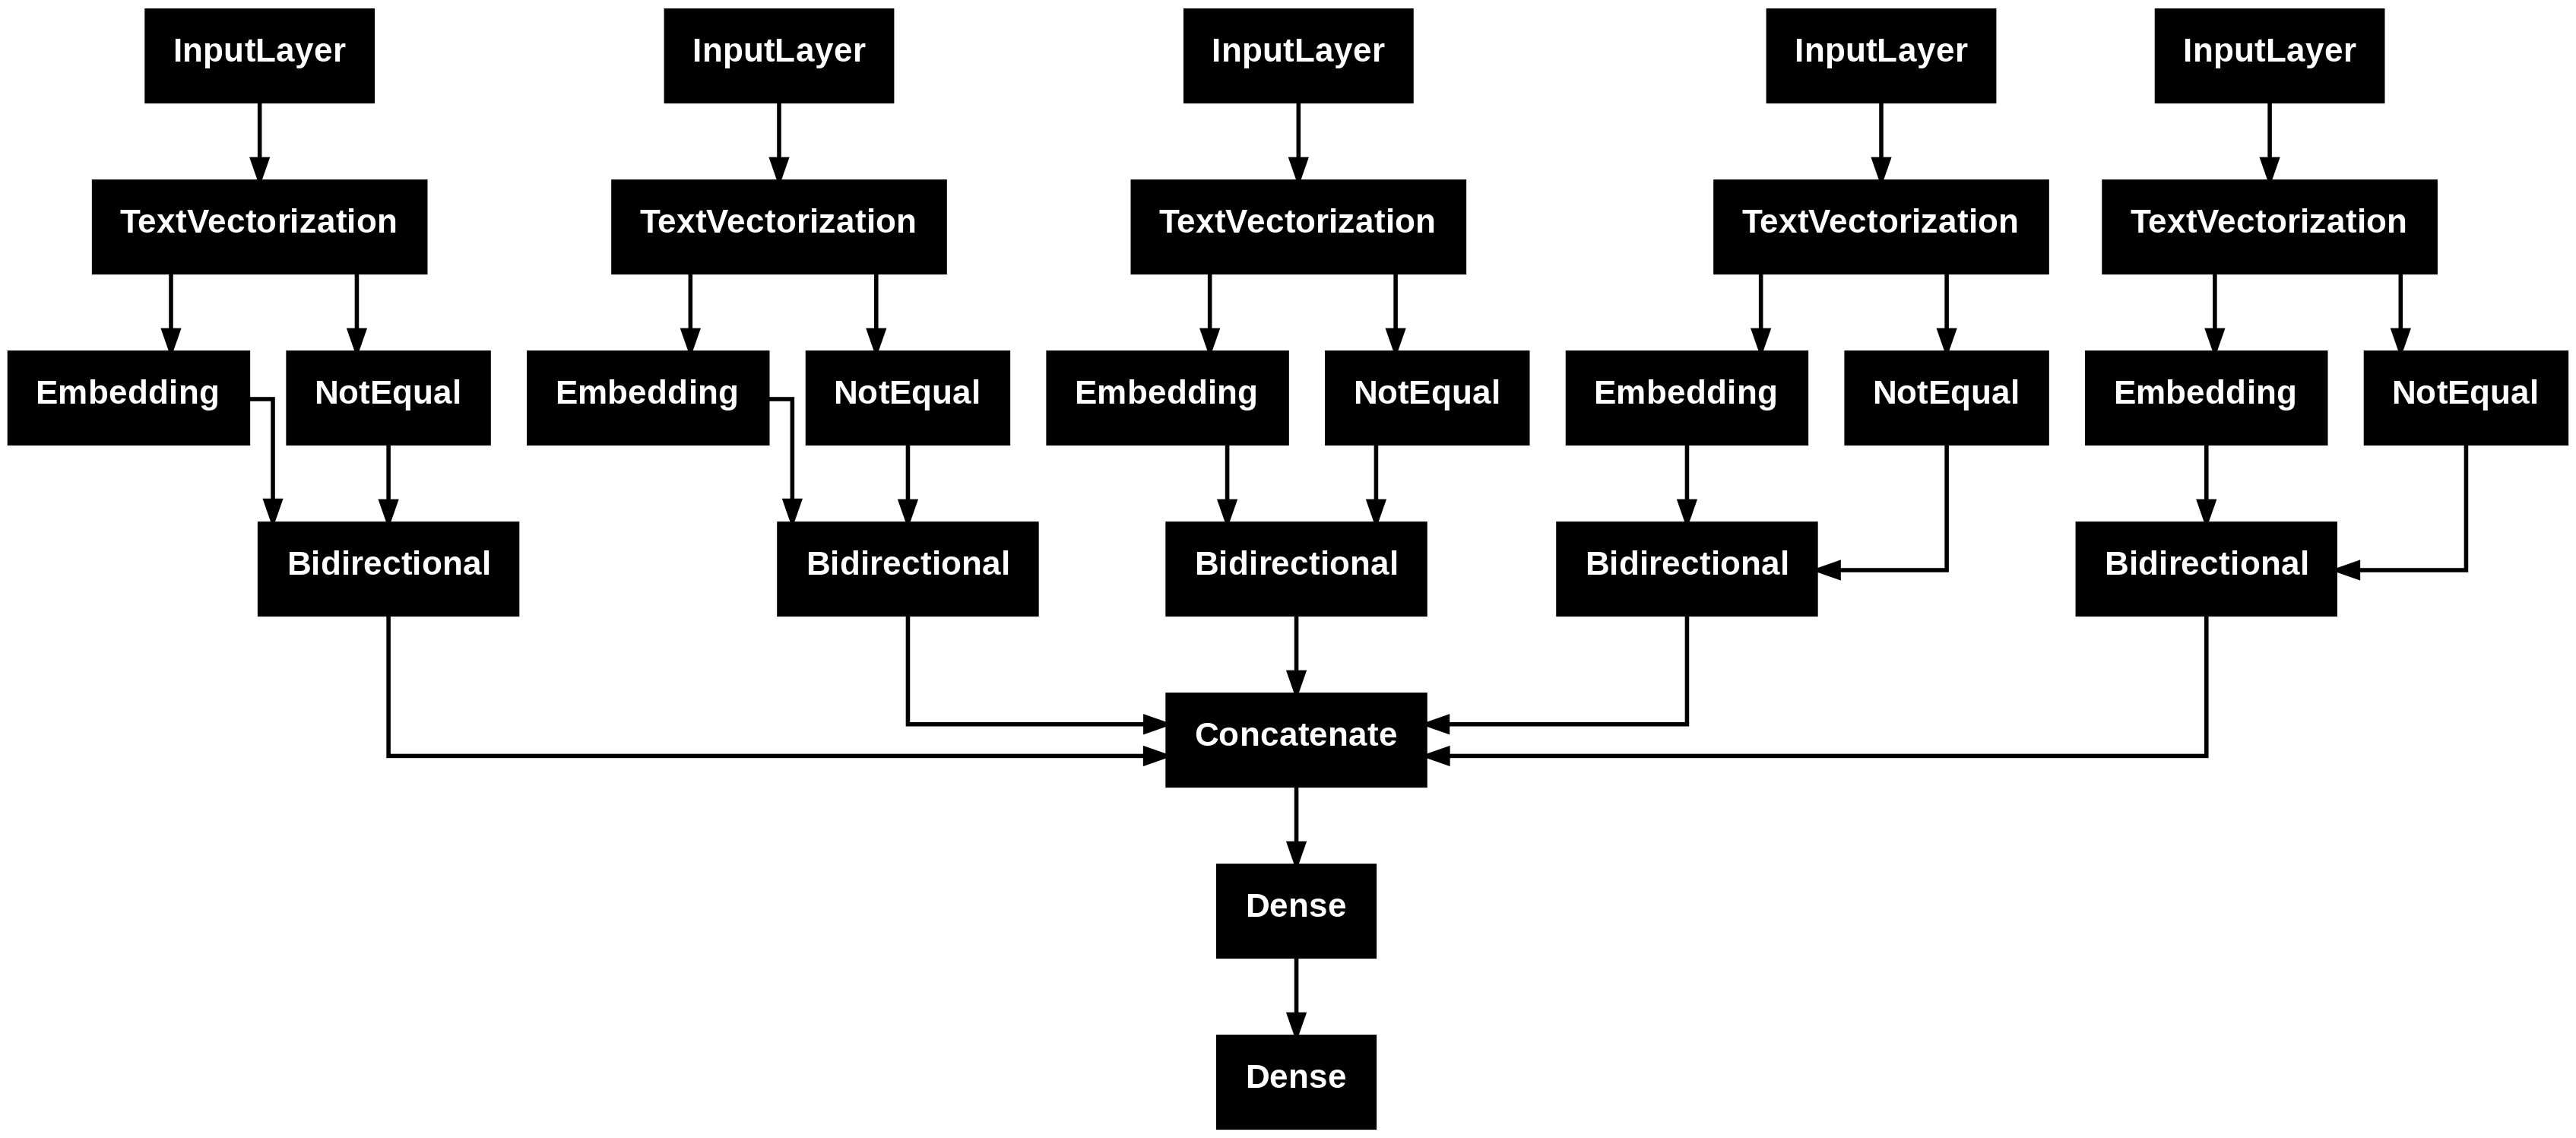

In [ ]:
keras.utils.plot_model(model_rnn)

In [ ]:
# history = model_rnn.fit([train_text1, train_text2,train_text3,train_text4,train_text5], train_labels, epochs=5, validation_data=([val_text1, val_text2,val_text3,val_text4,val_text5], val_labels))


In [ ]:

# history.history

In [ ]:
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(loss) + 1)
# plt.figure()
# plt.plot(epochs, loss, label='Training loss')
# plt.plot(epochs, val_loss, label='Validation loss')
# plt.title('Training and validation loss (Text Only Data)')
# plt.legend()
# plt.show()

In [ ]:

# auc = history.history['auc']
# val_auc = history.history['val_auc']
# epochs = range(1, len(auc) + 1)
# plt.figure()
# plt.plot(epochs, auc, label='Training AUC')
# plt.plot(epochs, val_auc, label='Validation AUC')
# plt.title('Training and validation AUC (Text Only Data)')
# plt.legend()
# plt.show()

In [ ]:
# fp = history.history['fp']
# val_fp = history.history['val_fp']
# epochs = range(1, len(fp) + 1)
# plt.figure()
# plt.plot(epochs, fp, label='Training False Positives')
# plt.plot(epochs, val_fp, label='Validation False Positives')
# plt.title('Training and validation False Positives (Text Only Data)')
# plt.legend()
# plt.show()

In [ ]:

# fn = history.history['fn']
# val_fn = history.history['val_fn']
# epochs = range(1, len(fn) + 1)
# plt.figure()
# plt.plot(epochs, fn, label='Training False Negatives')
# plt.plot(epochs,  val_fn, label='Validation False Negatives')
# plt.title('Training and validation False Negatives (Text Only Data)')
# plt.legend()
# plt.show()


In [ ]:
# all_text1=np.concatenate((train_text1, val_text1))
# all_text2=np.concatenate((train_text2, val_text2))
# all_text3=np.concatenate((train_text3, val_text3))
# all_text4=np.concatenate((train_text4, val_text4))
# all_text5=np.concatenate((train_text5, val_text5))

# all_labels= np.concatenate((train_labels, val_labels))

# model_rnn2 = build_text_rnn()
# model_rnn2.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
#                     loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#                     metrics=metrics_list)
# print(model_rnn2.summary())

In [ ]:
# history2 = model_rnn2.fit([all_text1, all_text2, all_text3, all_text4, all_text5], all_labels, epochs=5, validation_data=([test_text1, test_text2, test_text3, test_text4, test_text5], test_labels))


In [ ]:

# history2.history

In [ ]:
# loss2 = history2.history['loss']
# val_loss2 = history2.history['val_loss']
# epochs2 = range(1, len(loss2) + 1)
# plt.figure()
# plt.plot(epochs2, loss2, label='Training loss')
# plt.plot(epochs2, val_loss2, label='Validation loss')
# plt.title('Train+Validation and Testing loss (Text Only Data)')
# plt.legend()
# plt.show()

In [ ]:
# auc2 = history2.history['auc']
# val_auc2 = history2.history['val_auc']
# epochs2 = range(1, len(auc2) + 1)
# plt.figure()
# plt.plot(epochs2, auc2, label='Training AUC')
# plt.plot(epochs2, val_auc2, label='Validation AUC')
# plt.title('Train+Validation and Testing AUC (Text Only Data)')
# plt.legend()
# plt.show()


In [ ]:

# fp2 = history.history['fp']
# val_fp2 = history.history['val_fp']
# epochs = range(1, len(fp2) + 1)
# plt.figure()
# plt.plot(epochs, fp2, label='Training False Positives')
# plt.plot(epochs, val_fp2, label='Validation False Positives')
# plt.title('Training+Validation / Testing False Positives (Text Only Data)')
# plt.legend()
# plt.show()

In [ ]:
# fn2 = history.history['fn']
# val_fn2 = history.history['val_fn']
# epochs = range(1, len(fn2) + 1)
# plt.figure()
# plt.plot(epochs, fn2, label='Training False Negatives')
# plt.plot(epochs,  val_fn2, label='Validation False Negatives')
# plt.title('Training+Validation / Testing False Negatives (Text Only Data)')
# plt.legend()
# plt.show()

In [ ]:
# model.fit(X_train_pad, y_train, epochs=20, batch_size=64, validation_data=(X_test_pad, y_test))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load the dataset
data = pd.read_csv('/content/fake_job_postings.csv')  # Replace with the correct file path

# Extract descriptions and labels
descriptions = data['description'].fillna('')  # Handle NaNs in descriptions
labels = data['fraudulent']  # Labels (0 for real, 1 for fake)

# Encode the labels (0 and 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(descriptions, y, test_size=0.2, random_state=42)

# Tokenize and pad the text sequences
max_words = 5000
max_len = 500
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Build the RNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(128, return_sequences=False))  # LSTM layer
model.add(Dense(10, activation='relu'))  # Dense hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model
model.fit(X_train_pad, y_train, epochs=7, batch_size=64, validation_data=(X_test_pad, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy}')


Epoch 1/7


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


224/224 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/step - accuracy: 0.9221 - loss: 0.2789 - val_accuracy: 0.9494 - val_loss: 0.1849
Epoch 2/7
224/224 ━━━━━━━━━━━━━━━━━━━━ 360s 1s/step - accuracy: 0.9543 - loss: 0.1592 - val_accuracy: 0.9494 - val_loss: 0.1739
Epoch 3/7
224/224 ━━━━━━━━━━━━━━━━━━━━ 325s 1s/step - accuracy: 0.9541 - loss: 0.1336 - val_accuracy: 0.9494 - val_loss: 0.1648
Epoch 4/7
224/224 ━━━━━━━━━━━━━━━━━━━━ 319s 1s/step - accuracy: 0.9571 - loss: 0.1111 - val_accuracy: 0.9642 - val_loss: 0.1432
Epoch 5/7
224/224 ━━━━━━━━━━━━━━━━━━━━ 341s 1s/step - accuracy: 0.9799 - loss: 0.0670 - val_accuracy: 0.9695 - val_loss: 0.1455
Epoch 6/7
224/224 ━━━━━━━━━━━━━━━━━━━━ 365s 1s/step - accuracy: 0.9887 - loss: 0.0471 - val_accuracy: 0.9648 - val_loss: 0.1561
Epoch 7/7
224/224 ━━━━━━━━━━━━━━━━━━━━ 308s 1s/step - accuracy: 0.9933 - loss: 0.0373 - val_accuracy: 0.9692 - val_loss: 0.1792
112/112 ━━━━━━━━━━━━━━━━━━━━ 32s 290ms/step - accuracy: 0.9727 - loss: 0.1563
Test Accuracy: 0.969239354133606


In [ ]:
######################BERT################################3

In [ ]:

#BERT dependencies
!pip install -q tensorflow-text
!pip install -q tf-models-official

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.24.0 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.


In [ ]:
# Install dependencies
!pip install -q tensorflow-text
!pip install -q tf-models-official

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text  # Ensure you have this for text processing
from official.nlp import optimization  # For creating the AdamW optimizer

# Set logger level to suppress warnings
tf.get_logger().setLevel('ERROR')

# Define the URLs for the models
small_bert_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/2'
preprocess_bert = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

# Load the preprocessing model
bert_preprocess_model = hub.KerasLayer(preprocess_bert)

# Sample input text for processing
text_test1 = ["Sample job posting text here."]

# Preprocess the text
text_preprocessed = bert_preprocess_model(text_test1)

# Inspect the keys and output shapes
print(f'Keys            : {list(text_preprocessed.keys())}')
print(f'Word Ids Shape  : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids        : {text_preprocessed["input_word_ids"][0, :30]}')
print(f'Input Mask Shape: {text_preprocessed["input_mask"].shape}')
print(f'Input Mask      : {text_preprocessed["input_mask"][0, :30]}')
print(f'Type Ids Shape  : {text_preprocessed["input_type_ids"].shape}')
print(f'Type Ids        : {text_preprocessed["input_type_ids"][0, :30]}')

# Load the BERT encoder model
bert_model = hub.KerasLayer(small_bert_encoder)

# Get BERT results (sequence and pooled outputs)
bert_results = bert_model(text_preprocessed)

# Inspect BERT outputs
print(f'Pooled Outputs Shape: {bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values: {bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape: {bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values: {bert_results["sequence_output"][0, :12]}')

# Now, let's define a function for preprocessing (no need to pass arguments)
def make_bert_preprocess_model():
    # Load the BERT preprocessing model from TensorFlow Hub
    bert_preprocess_model = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")

    # Tokenize and preprocess the input text
    def preprocess_input(input_segments):
        # Convert the list of strings into a tf.Tensor (string type)
        input_tensor = tf.constant(input_segments, dtype=tf.string)
        return bert_preprocess_model(input_tensor)

    return preprocess_input

# Example input: A list of text sentences
train_text1 = ["Job title: Software Engineer",
               "Location: Hyderabad",
               "Description: Develop software applications."]

# Preprocess the training data using the defined preprocessing model
preproc_model1 = make_bert_preprocess_model()  # Don't pass any arguments here
preproc1 = preproc_model1(train_text1)  # Pass the input text directly

# Print the preprocessed input to see the output
print('Preprocessed input:')
print('Keys           : ', list(preproc1.keys()))
print('Shape Word Ids : ', preproc1['input_word_ids'].shape)
print('Word Ids       : ', preproc1['input_word_ids'][0, :20])
print('Shape Mask     : ', preproc1['input_mask'].shape)
print('Input Mask     : ', preproc1['input_mask'][0, :20])
print('Shape Type Ids : ', preproc1['input_type_ids'].shape)
print('Type Ids       : ', preproc1['input_type_ids'][0, :20])

# Example usage: Preprocessing for other data
train_text2 = ["Category: Full-time", "Skills: Python, TensorFlow"]

# Preprocess the second set of text
preproc_model2 = make_bert_preprocess_model()  # Reusing the function without arguments
preproc2 = preproc_model2(train_text2)  # Pass the input text directly

# Inspect the preprocessed data
print('Preprocessed second set of data:')
print('Keys           : ', list(preproc2.keys()))
print('Shape Word Ids : ', preproc2['input_word_ids'].shape)
print('Word Ids       : ', preproc2['input_word_ids'][0, :20])
print('Shape Mask     : ', preproc2['input_mask'].shape)
print('Input Mask     : ', preproc2['input_mask'][0, :20])
print('Shape Type Ids : ', preproc2['input_type_ids'].shape)
print('Type Ids       : ', preproc2['input_type_ids'][0, :20])

# Define the BERT model architecture (for further fine-tuning or training)
bert_model = hub.KerasLayer(small_bert_encoder)

# Train or fine-tune with the BERT outputs and preprocessed inputs
bert_results1 = bert_model(preproc1)
bert_results2 = bert_model(preproc2)

# Inspect the BERT outputs for both sets
print(f'Pooled Outputs Shape for 1st input: {bert_results1["pooled_output"].shape}')
print(f'Sequence Outputs Shape for 1st input: {bert_results1["sequence_output"].shape}')
print(f'Pooled Outputs Shape for 2nd input: {bert_results2["pooled_output"].shape}')
print(f'Sequence Outputs Shape for 2nd input: {bert_results2["sequence_output"].shape}')


Keys            : ['input_type_ids', 'input_mask', 'input_word_ids']
Word Ids Shape  : (1, 128)
Word Ids        : [  101  7099  3105 14739  3793  2182  1012   102     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0]
Input Mask Shape: (1, 128)
Input Mask      : [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Type Ids Shape  : (1, 128)
Type Ids        : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Pooled Outputs Shape: (1, 512)
Pooled Outputs Values: [ 0.99829954  0.97224635  0.08400374 -0.04700523  0.2605229   0.9917809
  0.9967967  -0.9961479  -0.01744059 -0.9782463   0.17836556 -0.9917151 ]
Sequence Outputs Shape: (1, 128, 512)
Sequence Outputs Values: [[ 0.15119742 -0.40400547 -0.18626931 ... -0.9831214   1.0123742
   0.66114783]
 [-0.2428975  -0.0285762   0.12155065 ... -0.38848096  0.7339471
   0.44286346]
 [ 0.19696024 -0.5034062   0.13748857 ... -0.41291922 -0.6432123


In [ ]:
###3Visualizing Token Frequencies with a Bar Graph Using BERT Output

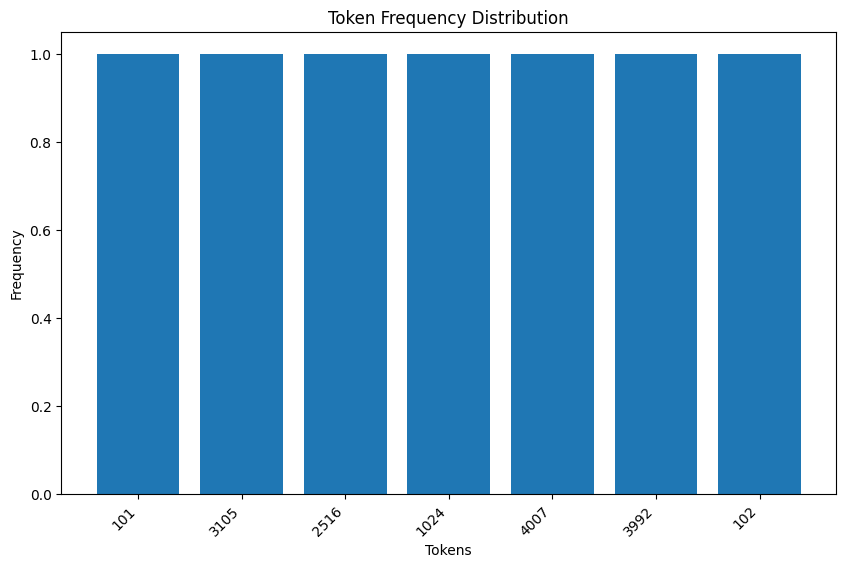

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text  # For text preprocessing

# Define the URLs for the models
preprocess_bert = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
small_bert_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/2'

# Load the preprocessing model from TensorFlow Hub
bert_preprocess_model = hub.KerasLayer(preprocess_bert)

# Sample input text for processing
text_test = ["Job title: Software Engineer", "Location: Hyderabad", "Description: Develop software applications."]

# Preprocess the text
text_preprocessed = bert_preprocess_model(text_test)

# Extract input word IDs (tokenized words) from the preprocessed text
input_word_ids = text_preprocessed['input_word_ids']

# Convert the tokenized words to numpy arrays for further processing
word_ids = input_word_ids.numpy()

# Load the BERT encoder model from TensorFlow Hub
bert_model = hub.KerasLayer(small_bert_encoder)

# Get BERT results (sequence output)
bert_results = bert_model(text_preprocessed)
sequence_output = bert_results['sequence_output']

# Function to visualize the frequency of tokens in the input text
def plot_token_frequencies(word_ids, word_to_token_map):
    # Convert word IDs back to words using the BERT tokenizer
    tokens = [word_to_token_map[i] for i in word_ids[0] if i != 0]  # Remove padding tokens (ID 0)

    # Count token frequencies
    token_freq = {}
    for token in tokens:
        if token not in token_freq:
            token_freq[token] = 1
        else:
            token_freq[token] += 1

    # Sort by frequency
    sorted_tokens = sorted(token_freq.items(), key=lambda item: item[1], reverse=True)
    tokens, frequencies = zip(*sorted_tokens)

    # Plot the frequencies in a bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(tokens, frequencies)
    plt.xlabel('Tokens')
    plt.ylabel('Frequency')
    plt.title('Token Frequency Distribution')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Example usage: Visualize the token frequency from the preprocessed text
# Create a mapping of token IDs to token strings
word_to_token_map = {i: str(i) for i in range(30522)}  # Example map for demo purposes
plot_token_frequencies(word_ids, word_to_token_map)


In [ ]:
#####confusion matix

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


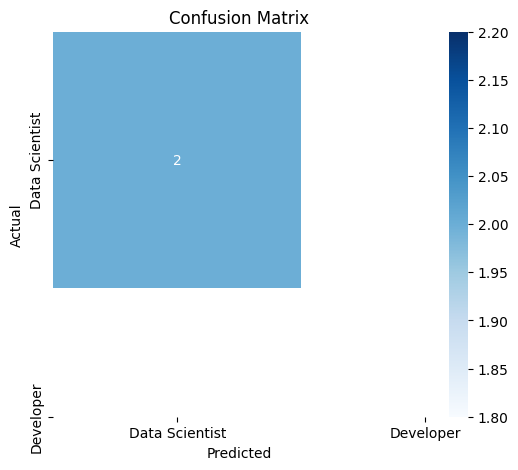

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define the BERT preprocessing and encoding model
preprocess_bert = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
small_bert_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/2'

# Load BERT preprocessing and encoder models
bert_preprocess_model = hub.KerasLayer(preprocess_bert)
bert_model = hub.KerasLayer(small_bert_encoder)

# Sample input text for classification (could be job descriptions, etc.)
texts = ["Software Engineer job in Hyderabad", "Full-time Python Developer", "Data Scientist position",
         "Part-time Java Developer", "DevOps engineer needed in Bangalore", "Python full-stack developer"]

# Sample labels (let's assume binary classification: 1 = Developer, 0 = Data Scientist)
labels = [1, 1, 0, 1, 1, 1]

# Preprocess the texts
text_preprocessed = bert_preprocess_model(texts)

# Get BERT embeddings (sequence_output can be used for the sentence embeddings)
bert_results = bert_model(text_preprocessed)
embeddings = bert_results['pooled_output']

# Train a simple Logistic Regression model using the BERT embeddings
X_train, X_test, y_train, y_test = train_test_split(embeddings.numpy(), labels, test_size=0.3, random_state=42)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict labels using the trained classifier
y_pred = classifier.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Data Scientist', 'Developer'], yticklabels=['Data Scientist', 'Developer'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#########covariance matix

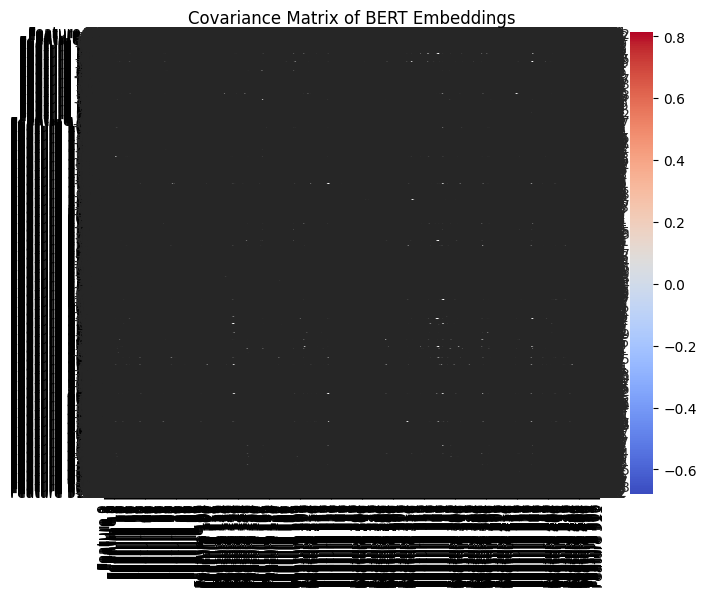

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

# Define the BERT preprocessing and encoding model
preprocess_bert = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
small_bert_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/2'

# Load BERT preprocessing and encoder models
bert_preprocess_model = hub.KerasLayer(preprocess_bert)
bert_model = hub.KerasLayer(small_bert_encoder)

# Sample input text for processing
texts = ["Software Engineer job in Hyderabad", "Full-time Python Developer", "Data Scientist position",
         "Part-time Java Developer", "DevOps engineer needed in Bangalore", "Python full-stack developer"]

# Preprocess the texts
text_preprocessed = bert_preprocess_model(texts)

# Get BERT embeddings (sequence_output can be used for the sentence embeddings)
bert_results = bert_model(text_preprocessed)
embeddings = bert_results['pooled_output']

# Compute the covariance matrix of the embeddings
cov_matrix = np.cov(embeddings.numpy(), rowvar=False)

# Plot the covariance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', xticklabels=[f'Feature {i}' for i in range(embeddings.shape[1])],
            yticklabels=[f'Feature {i}' for i in range(embeddings.shape[1])])
plt.title('Covariance Matrix of BERT Embeddings')
plt.show()


In [ ]:
###3Line Plot of BERT Embeddings Over Time

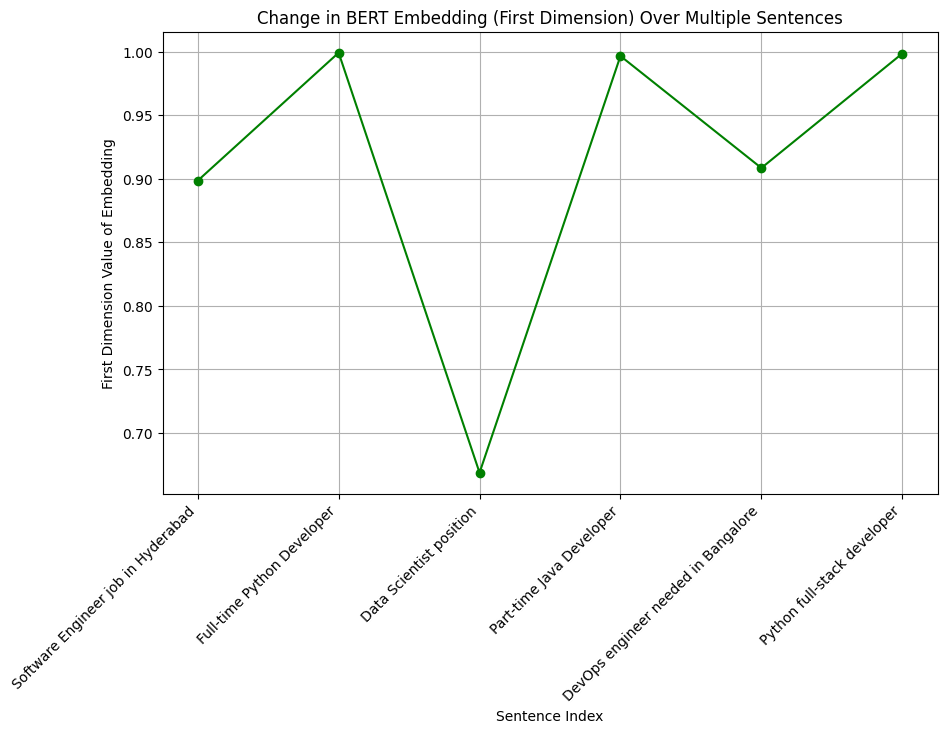

In [ ]:
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow_text as text
import numpy as np

# Define BERT preprocessing and encoding models
preprocess_bert = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
small_bert_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/2'

# Load BERT preprocessing and encoder models
bert_preprocess_model = hub.KerasLayer(preprocess_bert)
bert_model = hub.KerasLayer(small_bert_encoder)

# Sample input text for processing
texts = ["Software Engineer job in Hyderabad", "Full-time Python Developer", "Data Scientist position",
         "Part-time Java Developer", "DevOps engineer needed in Bangalore", "Python full-stack developer"]

# Preprocess the text input using the BERT preprocessing model
text_preprocessed = bert_preprocess_model(texts)

# Extract BERT embeddings (using 'pooled_output' for sentence-level embeddings)
bert_results = bert_model(text_preprocessed)
embeddings = bert_results['pooled_output']

# Extract the first dimension (you can select other dimensions if needed)
first_dim_values = embeddings.numpy()[:, 0]  # Getting values from the first dimension (dim=0)

# Plotting the change in the first dimension of the embeddings over multiple text inputs
plt.figure(figsize=(10, 6))
plt.plot(range(len(texts)), first_dim_values, marker='o', linestyle='-', color='g')
plt.title('Change in BERT Embedding (First Dimension) Over Multiple Sentences')
plt.xlabel('Sentence Index')
plt.ylabel('First Dimension Value of Embedding')
plt.xticks(range(len(texts)), texts, rotation=45, ha="right")
plt.grid(True)
plt.show()


In [ ]:
# Use DistilBERT or TinyBERT for better performance with less memory
distilbert_encoder = 'https://tfhub.dev/tensorflow/distilbert_en_uncased/1'


In [ ]:
import pandas as pd
import tensorflow_hub as hub
import tensorflow_text as text  # Dependency for BERT preprocessing
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load the dataset
data = pd.read_csv('/content/fake_job_postings.csv')  # Replace with the correct file path

# Extract descriptions and labels
descriptions = data['description'].fillna('')  # Handle NaNs in descriptions
labels = data['fraudulent']  # Labels (0 for real, 1 for fake)

# Encode the labels (0 and 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(descriptions, y, test_size=0.2, random_state=42)

# Define URLs for BERT preprocessing and encoder models (using BERT uncased model)
preprocess_bert = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
bert_encoder = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3'

# Load the BERT preprocessing and encoder models
bert_preprocess_model = hub.KerasLayer(preprocess_bert)
bert_model = hub.KerasLayer(bert_encoder)

# Preprocess the text using the BERT preprocessing model
def preprocess_text(texts):
    text_tensor = tf.convert_to_tensor(texts)
    return bert_preprocess_model(text_tensor)

# Batch process data using TensorFlow Dataset API for efficient processing
def batch_process_text(texts, batch_size=16):
    dataset = tf.data.Dataset.from_tensor_slices(texts)
    dataset = dataset.batch(batch_size)
    bert_embeddings = []

    for batch in dataset:
        batch_bert = bert_model(preprocess_text(batch))['pooled_output']
        bert_embeddings.append(batch_bert)

    return np.concatenate(bert_embeddings, axis=0)

# Pre-process the train and test data
X_train_bert = batch_process_text(X_train)
X_test_bert = batch_process_text(X_test)

# Define a simple dense layer classifier for BERT embeddings
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train_bert.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model using BERT embeddings (reduced batch size)
model.fit(X_train_bert, y_train, epochs=3, batch_size=16, validation_data=(X_test_bert, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_bert, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-7fa50ff1aa41>", line 49, in <cell line: 49>
    X_train_bert = batch_process_text(X_train)
  File "<ipython-input-1-7fa50ff1aa41>", line 43, in batch_process_text
    batch_bert = bert_model(preprocess_text(batch))['pooled_output']
  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/base_layer.py", line 1142, in __call__
    outputs = call_fn(inputs, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/utils/traceback_utils.py", line 96, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow_hub/keras_layer.py", line 250, in call
    re

TypeError: object of type 'NoneType' has no len()

In [ ]:


import tensorflow_hub as hub
import tensorflow_text as text # A dependency of the preprocessing model
from official.nlp import optimization  # to create AdamW optmizer

tf.get_logger().setLevel('ERROR') #filters out all messages

NameError: name 'tf' is not defined

In [ ]:
# classic_bert_encoder = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4' #bert_en_uncased_L-12_H-768_A-12
small_bert_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/2' ##considered small bert
# small_bert2_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/2' #considered tiny bert

preprocess_bert = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3" #same preprocess layer for all bert models that I will use

# print('Classic BERT model selected            :', classic_bert_encoder)
print('Small BERT model selected           :', small_bert_encoder)
# print('Small BERT model #2 selected           :', small_bert2_encoder)
print('Preprocessing model auto-selected      :', preprocess_bert)

Small BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/2
Preprocessing model auto-selected      : https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
# Example of defining train_text1
train_text1 = ["This is an example text that will be sliced. Add more text if needed."]

# Now you can slice the first 100 characters
text_test1 = [train_text1[0][:100]]

# Display the result
print(text_test1)


['This is an example text that will be sliced. Add more text if needed.']


In [ ]:

bert_preprocess_model = hub.KerasLayer(preprocess_bert)
text_preprocessed = bert_preprocess_model(text_test1)

print(f'Keys            : {list(text_preprocessed.keys())}')
print(f'Word Ids Shape  : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids        : {text_preprocessed["input_word_ids"][0, :30]}')
print(f'Input Mask Shape: {text_preprocessed["input_mask"].shape}')
print(f'Input Mask      : {text_preprocessed["input_mask"][0, :30]}')
print(f'Type Ids Shape  : {text_preprocessed["input_type_ids"].shape}')
print(f'Type Ids        : {text_preprocessed["input_type_ids"][0, :30]}')

NameError: name 'hub' is not defined

In [ ]:
bert_encoders = [small_bert_encoder] #small_bert2_encoder, classic_bert_encoder

for be in bert_encoders:
  bert_model = hub.KerasLayer(be) #The BERT models return a map with 3 important keys: pooled_output, sequence_output, encoder_outputs
  bert_results = bert_model(text_preprocessed)

  print(f'Loaded BERT: {be}')
  print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}') #The shape is [batch_size, H]. You can think of this as an embedding for the entire movie review.
  print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}') #For the fine-tuning you are going to use the pooled_output array
  print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
  print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}\n')


NameError: name 'hub' is not defined

In [ ]:
def make_bert_preprocess_model(sentence_features, seq_length=128):
  """Returns Model mapping string features to BERT inputs.

  Args:
    sentence_features: a list with the names of string-valued features.
    seq_length: an integer that defines the sequence length of BERT inputs.

  Returns:
    A Keras Model that can be called on a list or dict of string Tensors
    (with the order or names, resp., given by sentence_features) and
    returns a dict of tensors for input to BERT.
  """

  input_segments = [tf.keras.layers.Input(shape=(), dtype=tf.string, name=ft) for ft in sentence_features]

  # Tokenize the text to word pieces.
  bert_preprocess = hub.load(preprocess_bert)
  tokenizer = hub.KerasLayer(bert_preprocess.tokenize, name='tokenizer')
  segments = [tokenizer(s) for s in input_segments]

  # Optional: Trim segments in a smart way to fit seq_length.
  # Simple cases (like this example) can skip this step and let
  # the next step apply a default truncation to approximately equal lengths.
  truncated_segments = segments

  # Pack inputs. The details (start/end token ids, dict of output tensors)
  # are model-dependent, so this gets loaded from the SavedModel.
  packer = hub.KerasLayer(bert_preprocess.bert_pack_inputs,
                          arguments=dict(seq_length=seq_length),
                          name='packer')
  model_inputs = packer(truncated_segments)
  return tf.keras.Model(input_segments, model_inputs)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text  # A dependency of the preprocessing model

# Load the BERT preprocessing model URL
preprocess_bert = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

# Function to create the BERT preprocessing model
def make_bert_preprocess_model(seq_length=128):
    """Returns a preprocessing model that can process input strings for BERT."""

    # Load BERT preprocessing from TensorFlow Hub
    bert_preprocess = hub.KerasLayer(preprocess_bert)

    # Return the preprocessing model
    return bert_preprocess

# Preprocessing for BERT - TRAIN DATA
def preprocess_text_column(train_text):
    # Create a preprocessing model
    preproc_model = make_bert_preprocess_model()

    # Ensure the input is a batch of text; convert to a list if it's not already
    if isinstance(train_text, str):
        train_text = [train_text]

    # Convert the list of strings into a tensor of strings
    input_tensor = tf.constant(train_text)  # This is a real tensor, not a placeholder

    # Run the model to get preprocessed output
    preprocessed_output = preproc_model(input_tensor)

    return preprocessed_output

# Example data
train_text1 = "This is a job title and description."
train_text2 = "Category variables of the job."
train_text3 = "Profile of the company."
train_text4 = "Requirements for the job position."
train_text5 = "Benefits offered by the company."

# Process each column using the defined function
preproc1 = preprocess_text_column(train_text1)
preproc2 = preprocess_text_column(train_text2)
preproc3 = preprocess_text_column(train_text3)
preproc4 = preprocess_text_column(train_text4)
preproc5 = preprocess_text_column(train_text5)

# Example to print shapes of the outputs
print(f'Title Loc Description Preprocessed Shape: {preproc1["input_word_ids"].shape}')
print(f'Cat Vars Preprocessed Shape: {preproc2["input_word_ids"].shape}')
print(f'Company Profile Preprocessed Shape: {preproc3["input_word_ids"].shape}')
print(f'Requirements Preprocessed Shape: {preproc4["input_word_ids"].shape}')
print(f'Benefits Preprocessed Shape: {preproc5["input_word_ids"].shape}')



In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text # A dependency of the preprocessing model
from official.nlp import optimization  # to create AdamW optmizer

tf.get_logger().setLevel('ERROR') #filters out all messages

In [ ]:
# classic_bert_encoder = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4' #bert_en_uncased_L-12_H-768_A-12
small_bert_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/2' ##considered small bert
# small_bert2_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/2' #considered tiny bert

preprocess_bert = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3" #same preprocess layer for all bert models that I will use

# print('Classic BERT model selected            :', classic_bert_encoder)
print('Small BERT model selected           :', small_bert_encoder)
# print('Small BERT model #2 selected           :', small_bert2_encoder)
print('Preprocessing model auto-selected      :', preprocess_bert)

In [ ]:
text_test1 = [train_text1[0][:100]]


In [ ]:
bert_preprocess_model = hub.KerasLayer(preprocess_bert)
text_preprocessed = bert_preprocess_model(text_test1)

print(f'Keys            : {list(text_preprocessed.keys())}')
print(f'Word Ids Shape  : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids        : {text_preprocessed["input_word_ids"][0, :30]}')
print(f'Input Mask Shape: {text_preprocessed["input_mask"].shape}')
print(f'Input Mask      : {text_preprocessed["input_mask"][0, :30]}')
print(f'Type Ids Shape  : {text_preprocessed["input_type_ids"].shape}')
print(f'Type Ids        : {text_preprocessed["input_type_ids"][0, :30]}')


In [ ]:
bert_encoders = [small_bert_encoder] #small_bert2_encoder, classic_bert_encoder

for be in bert_encoders:
  bert_model = hub.KerasLayer(be) #The BERT models return a map with 3 important keys: pooled_output, sequence_output, encoder_outputs
  bert_results = bert_model(text_preprocessed)

  print(f'Loaded BERT: {be}')
  print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}') #The shape is [batch_size, H]. You can think of this as an embedding for the entire movie review.
  print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}') #For the fine-tuning you are going to use the pooled_output array
  print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
  print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}\n')


In [ ]:
def make_bert_preprocess_model(sentence_features, seq_length=128):
  """Returns Model mapping string features to BERT inputs.

  Args:
    sentence_features: a list with the names of string-valued features.
    seq_length: an integer that defines the sequence length of BERT inputs.

  Returns:
    A Keras Model that can be called on a list or dict of string Tensors
    (with the order or names, resp., given by sentence_features) and
    returns a dict of tensors for input to BERT.
  """

  input_segments = [tf.keras.layers.Input(shape=(), dtype=tf.string, name=ft) for ft in sentence_features]

  # Tokenize the text to word pieces.
  bert_preprocess = hub.load(preprocess_bert)
  tokenizer = hub.KerasLayer(bert_preprocess.tokenize, name='tokenizer')
  segments = [tokenizer(s) for s in input_segments]

  # Optional: Trim segments in a smart way to fit seq_length.
  # Simple cases (like this example) can skip this step and let
  # the next step apply a default truncation to approximately equal lengths.
  truncated_segments = segments

  # Pack inputs. The details (start/end token ids, dict of output tensors)
  # are model-dependent, so this gets loaded from the SavedModel.
  packer = hub.KerasLayer(bert_preprocess.bert_pack_inputs,
                          arguments=dict(seq_length=seq_length),
                          name='packer')
  model_inputs = packer(truncated_segments)
  return tf.keras.Model(input_segments, model_inputs)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text # A dependency of the preprocessing model

# Load the BERT preprocessing model URL
preprocess_bert = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

# Function to create the BERT preprocessing model
def make_bert_preprocess_model():
    """Returns a preprocessing model that can process input strings for BERT."""
    # Load BERT preprocessing from TensorFlow Hub
    bert_preprocess = hub.KerasLayer(preprocess_bert)
    return bert_preprocess

# Preprocessing for BERT - TRAIN DATA
def preprocess_text(train_text):
    # Create a preprocessing model
    preproc_model = make_bert_preprocess_model()

    # Ensure the input is a batch of text; convert to a list if it's not already
    if isinstance(train_text, str):
        train_text = [train_text]

    # Convert the list of strings into a tensor of strings
    input_tensor = tf.constant(train_text)  # This is a real tensor, not a placeholder

    # Run the model to get preprocessed output
    preprocessed_output = preproc_model(input_tensor)

    return preprocessed_output

# Example data
train_text1 = "This is a job title and description."
train_text2 = "Category variables of the job."
train_text3 = "Profile of the company."
train_text4 = "Requirements for the job position."
train_text5 = "Benefits offered by the company."

# Process each column using the defined function
preproc1 = preprocess_text(train_text1)
preproc2 = preprocess_text(train_text2)
preproc3 = preprocess_text(train_text3)
preproc4 = preprocess_text(train_text4)
preproc5 = preprocess_text(train_text5)

# Example to print shapes of the outputs
print(f'Title Loc Description Preprocessed Shape: {preproc1["input_word_ids"].shape}')
print(f'Cat Vars Preprocessed Shape: {preproc2["input_word_ids"].shape}')
print(f'Company Profile Preprocessed Shape: {preproc3["input_word_ids"].shape}')
print(f'Requirements Preprocessed Shape: {preproc4["input_word_ids"].shape}')
print(f'Benefits Preprocessed Shape: {preproc5["input_word_ids"].shape}')



In [ ]:

import tensorflow as tf

# Process 'title_loc_description' text again with proper batching
try:
    # Check if preproc1 is defined
    if 'preproc1' not in locals():
        preproc_model1 = make_bert_preprocess_model(['title_loc_description'])

        # Make sure text1 is properly formatted as a batch (even if it's just one sentence)
        text1 = tf.constant([train_text1])  # Wrap in TensorFlow constant to avoid errors

        # Preprocess the text using the BERT preprocessor model
        preproc1 = preproc_model1(text1)

        print('Preprocessing successful')

    # Print the processed outputs
    print('preproc1 - training')
    print('Keys           : ', list(preproc1.keys()))
    print('Shape Word Ids : ', preproc1['input_word_ids'].shape)
    print('Word Ids       : ', preproc1['input_word_ids'][0, :20])
    print('Shape Mask     : ', preproc1['input_mask'].shape)
    print('Input Mask     : ', preproc1['input_mask'][0, :20])
    print('Shape Type Ids : ', preproc1['input_type_ids'].shape)
    print('Type Ids       : ', preproc1['input_type_ids'][0, :20])

except NameError as e:
    print(f"Error: {e}. It seems `preproc1` is not defined.")
except ValueError as e:
    print(f"ValueError: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")




In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text  # A dependency for the BERT preprocessing model

# Load the BERT preprocessing model from TensorFlow Hub
preprocess_bert = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

# Function to create the BERT preprocessing model
def make_bert_preprocess_model(sentence_features, seq_length=128):
    """Returns a Keras Model mapping string features to BERT inputs."""

    # Define the input layer for each feature
    input_segments = [tf.keras.layers.Input(shape=(), dtype=tf.string, name=ft) for ft in sentence_features]

    # Load BERT preprocessing from TensorFlow Hub
    bert_preprocess = hub.KerasLayer(preprocess_bert, trainable=False)

    # Apply BERT preprocessing to the input (ensure batched inputs)
    processed_inputs = bert_preprocess(tf.expand_dims(input_segments[0], axis=0))  # Add batch dimension

    # Return the model mapping input features to BERT inputs
    return tf.keras.Model(inputs=input_segments[0], outputs=processed_inputs)

# Create preprocessing model for 'title_loc_description'
preproc_model1 = make_bert_preprocess_model(['title_loc_description'])

# Plot the model architecture
tf.keras.utils.plot_model(preproc_model1, show_shapes=True, show_layer_names=True)

# Example input for testing (batch size 1)
example_text = ["This is a job title and description."]

# Run the preprocessing model on example input
preprocessed_output = preproc_model1(tf.constant(example_text))

# Check the output shape and type
print(f"Preprocessed output: {preprocessed_output}")



In [ ]:

tf.keras.utils.plot_model(preproc_model3)

In [ ]:
tf.keras.utils.plot_model(preproc_model4)

In [ ]:

tf.keras.utils.plot_model(preproc_model5)

In [ ]:
#PREPROCESSING FOR BERT - VAL DATA
val_texts=[val_text1, val_text2, val_text3, val_text4, val_text5]
val_preproc1 = preproc_model1([val_texts[0]]) #title_loc_description
val_preproc2 = preproc_model2([val_texts[1]]) #cat_vars
val_preproc3 = preproc_model3([val_texts[2]]) #company_profile
val_preproc4 = preproc_model4([val_texts[3]]) #requirements
val_preproc5 = preproc_model5([val_texts[4]]) #benefits

#PREPROCESSING FOR BERT - TEST DATA
test_texts=[test_text1, test_text2, test_text3, test_text4, test_text5]
test_preproc1 = preproc_model1([test_texts[0]]) #title_loc_description
test_preproc2 = preproc_model2([test_texts[1]]) #cat_vars
test_preproc3 = preproc_model3([test_texts[2]]) #company_profile
test_preproc4 = preproc_model4([test_texts[3]]) #requirements
test_preproc5 = preproc_model5([test_texts[4]]) #benefits

In [ ]:
def build_bert_model(encoder):
  inputs1 = dict(
        input_word_ids=tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_word_ids1'),
        input_mask=tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_mask1'),
        input_type_ids=tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_type_ids1')
    )
  encoder1 = hub.KerasLayer(encoder, trainable=True, name='BERT_encoder1')
  net1=encoder1(inputs1)['pooled_output']

  inputs2 = dict(
        input_word_ids=tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_word_ids2'),
        input_mask=tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_mask2'),
        input_type_ids=tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_type_ids2')
    )
  encoder2 = hub.KerasLayer(encoder, trainable=True, name='BERT_encoder2')
  net2=encoder2(inputs2)['pooled_output']

  inputs3 = dict(
        input_word_ids=tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_word_ids3'),
        input_mask=tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_mask3'),
        input_type_ids=tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_type_ids3')
    )
  encoder3 = hub.KerasLayer(encoder, trainable=True, name='BERT_encoder3')
  net3=encoder3(inputs3)['pooled_output']

  inputs4 = dict(
        input_word_ids=tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_word_ids4'),
        input_mask=tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_mask4'),
        input_type_ids=tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_type_ids4')
    )
  encoder4 = hub.KerasLayer(encoder, trainable=True, name='BERT_encoder4')
  net4=encoder4(inputs4)['pooled_output']

  inputs5 = dict(
        input_word_ids=tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_word_ids5'),
        input_mask=tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_mask5'),
        input_type_ids=tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_type_ids5')
    )
  encoder5 = hub.KerasLayer(encoder, trainable=True, name='BERT_encoder5')
  net5=encoder5(inputs5)['pooled_output']

  inputs = tf.keras.layers.concatenate([net1, net2, net3, net4, net5])
  x = tf.keras.layers.Dropout(0.1)(inputs)
  output = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')(x)
  return tf.keras.Model(inputs=[inputs1, inputs2, inputs3, inputs4, inputs5], outputs=[output])

In [ ]:

small_bert_model = build_bert_model(small_bert_encoder)
print(small_bert_model.summary())

In [ ]:

tf.keras.utils.plot_model(small_bert_model)

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

metrics_list = [
        keras.metrics.FalsePositives(name='fp'),
        keras.metrics.FalseNegatives(name='fn'),
        keras.metrics.BinaryAccuracy(name='accuracy'),
        keras.metrics.AUC(name='auc')
  ]

metrics = metrics_list

In [ ]:

epochs = 1
steps_per_epoch = len(train_t)
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:

print(steps_per_epoch)
print(num_train_steps)
print(num_warmup_steps)

In [ ]:
small_bert_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:

#training model with small bert
history = small_bert_model.fit([preproc1, preproc2, preproc3, preproc4, preproc5], train_labels, epochs=1, validation_data=([val_preproc1, val_preproc2, val_preproc3, val_preproc4, val_preproc5], val_labels))


In [ ]:

history.history

In [ ]:
small_bert_model.evaluate([test_preproc1, test_preproc2, test_preproc3, test_preproc4, test_preproc5], test_labels)
